# **Stock Movement Analysis Based on Social Media Sentiment**

installing required libraries

In [ ]:
pip install yfinance pandas numpy matplotlib tensorflow scikit-learn


**Fetch NASDAQ-100 Stock Data:** Using yfinance to download stock data for the NASDAQ-100 stocks.

In [ ]:
import yfinance as yf
import pandas as pd
from zoneinfo import ZoneInfo

# List of NASDAQ-100 companies
nasdaq_100_symbols = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'META', 'NVDA', 'INTC', 'CSCO', 'AMD', 'PYPL', 'NFLX']

# Download stock data
stocks_data = yf.download(nasdaq_100_symbols, start='2018-01-01', end='2023-01-01', prepost=True, threads=True)

# Convert the index to the desired timezone
stocks_data.index = stocks_data.index.tz_localize('UTC').tz_convert(ZoneInfo('Asia/Kolkata'))

# Continue with your analysis as before
adj_close = stocks_data['Adj Close']
adj_close.to_csv('nasdaq_100_stocks.csv')

[*********************100%***********************]  12 of 12 completed


**Data Preprocessing:** Need to preprocess the stock data for LSTM. This involves scaling the data and preparing it for time series forecasting.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Use Min-Max scaling for normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(adj_close)

# Convert the data to a format suitable for LSTM (X, y)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 0])  # We predict the next day's price
    return np.array(X), np.array(y)

time_step = 60  # Look-back window for LSTM
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be 3D for LSTM: [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))


**Build and Train the LSTM Model:** Now, I can built the LSTM model using TensorFlow and Keras.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))  # Predict the next closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=20, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 50ms/step - loss: 0.1480
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 50ms/step - loss: 0.0062
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 49ms/step - loss: 0.0055
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 50ms/step - loss: 0.0044
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 86ms/step - loss: 0.0046
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 50ms/step - loss: 0.0039
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 49ms/step - loss: 0.0041
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 49ms/step - loss: 0.0036
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 63ms/step - loss: 0.0039
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

**Evaluate the Model:** After training, I can evaluated the model's performance by predicting future stock prices.

In [ ]:
# Make predictions
predictions = model.predict(X)

# Reshape predictions to have the same number of features as the original data
predictions = predictions.reshape(-1, 1)
predictions = np.repeat(predictions, adj_close.shape[1], axis=1) # Repeat for each feature

# Reverse scaling to get actual prices
predictions_rescaled = scaler.inverse_transform(predictions)

# Example: Print the first 5 predictions
print(predictions_rescaled[:5])

38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step
[[ 42.063946   18.046955   66.5556     30.275942   54.37284    25.962187
  104.985596   93.05295   195.73163     4.8374414  81.01906    34.178852 ]
 [ 41.553337   17.510817   66.10834    30.17161    54.0152     25.827576
  103.95685    92.15338   193.88333     4.7313075  80.171196   32.778385 ]
 [ 41.012398   16.942827   65.63451    30.061073   53.636314   25.684965
  102.866974   91.20037   191.92523     4.6188693  79.27295    31.294718 ]
 [ 40.577854   16.486563   65.253876   29.972284   53.331947   25.570404
  101.991486   90.434814  190.35228     4.528547   78.55139    30.102882 ]
 [ 40.305412   16.200497   65.015236   29.916615   53.14112    25.498579
  101.44258    89.954834  189.36609     4.4719176  78.099      29.35564  ]]


**Visualize the Results:** I visualized the predicted vs actual prices to assess the performance of the LSTM model. As the model didn't involved any sentiment analysis, the prediction is nearly accurrate and the Stock price I have taken is from 1-1-2018 to 1-1-2023

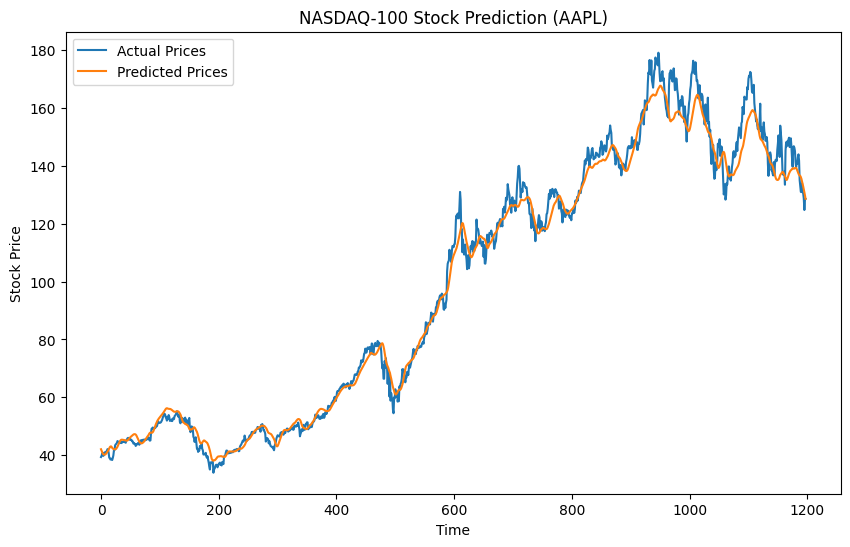

In [ ]:
import matplotlib.pyplot as plt

# Plot the results for the first stock (AAPL)
actual_prices = scaler.inverse_transform(scaled_data[time_step+1:])

plt.figure(figsize=(10, 6))
plt.plot(actual_prices[:, 0], label='Actual Prices')
plt.plot(predictions_rescaled[:, 0], label='Predicted Prices')
plt.title('NASDAQ-100 Stock Prediction (AAPL)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


**Evaluating Multiple Stocks:** We want to predict stock price movements for multiple stocks, I used the following approach:

1. Train separate models for each stock or create a multi-output model that predicts prices for each stock simultaneously.
2. Use a similar process for each stock, but ensure that the data is normalized and processed separately for each one.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 55ms/step - loss: 0.0669
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 81ms/step - loss: 0.0050
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 49ms/step - loss: 0.0043
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 51ms/step - loss: 0.0038
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 50ms/step - loss: 0.0039
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 49ms/step - loss: 0.0037
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 53ms/step - loss: 0.0034
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 81ms/step - loss: 0.0030
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 50ms/step - loss: 0.0034
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

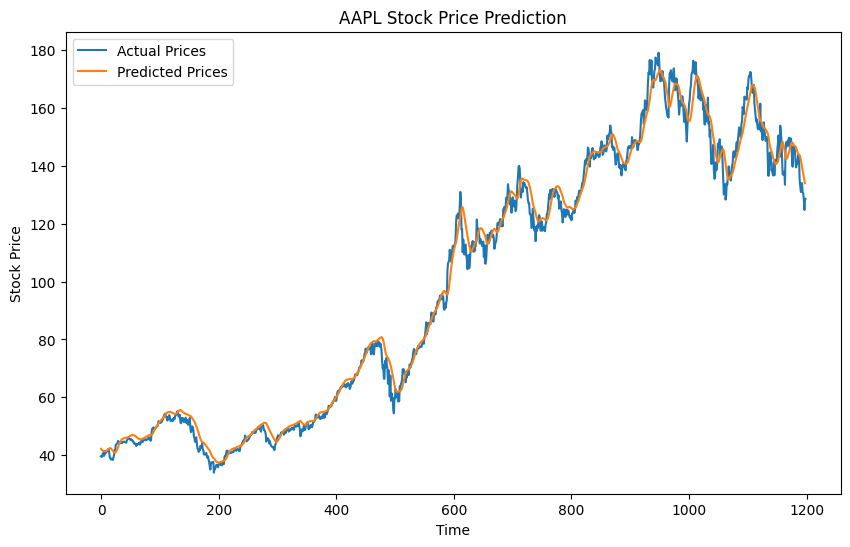

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 54ms/step - loss: 0.1312
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 53ms/step - loss: 0.0055
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 52ms/step - loss: 0.0045
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 51ms/step - loss: 0.0035
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0033
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 80ms/step - loss: 0.0035
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 51ms/step - loss: 0.0029
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 51ms/step - loss: 0.0029
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 52ms/step - loss: 0.0029
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

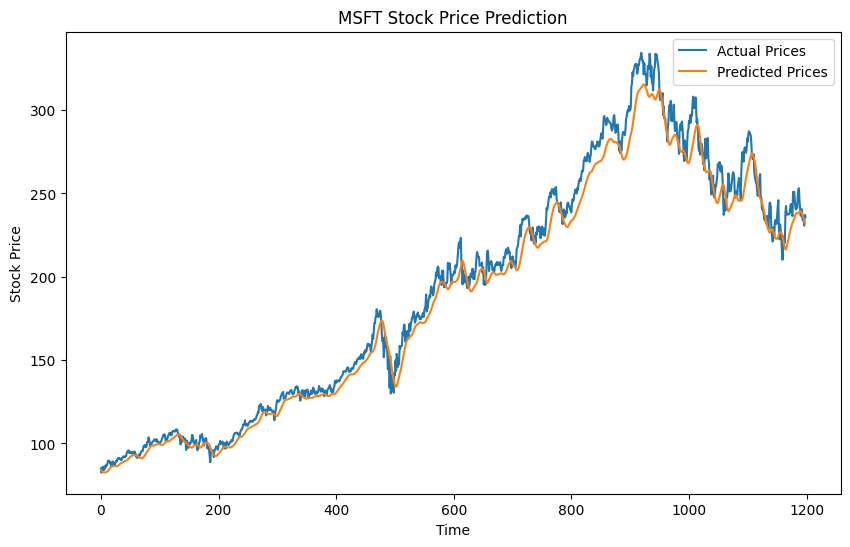

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 54ms/step - loss: 0.0717
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 54ms/step - loss: 0.0040
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 53ms/step - loss: 0.0043
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 67ms/step - loss: 0.0037
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 53ms/step - loss: 0.0041
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 54ms/step - loss: 0.0030
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 54ms/step - loss: 0.0030
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 55ms/step - loss: 0.0033
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 77ms/step - loss: 0.0029
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

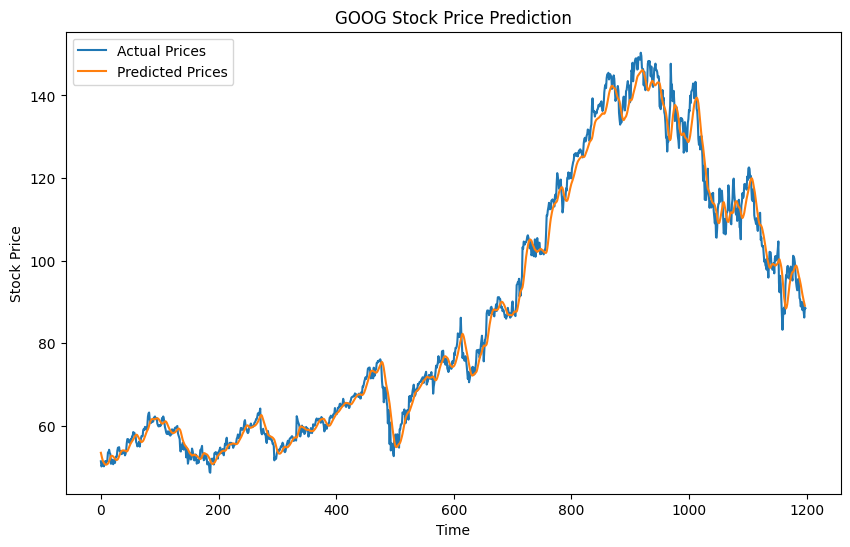

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 57ms/step - loss: 0.1006
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 56ms/step - loss: 0.0068
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 67ms/step - loss: 0.0058
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 85ms/step - loss: 0.0052
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 55ms/step - loss: 0.0051
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 56ms/step - loss: 0.0054
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 57ms/step - loss: 0.0047
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 77ms/step - loss: 0.0048
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 55ms/step - loss: 0.0044
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

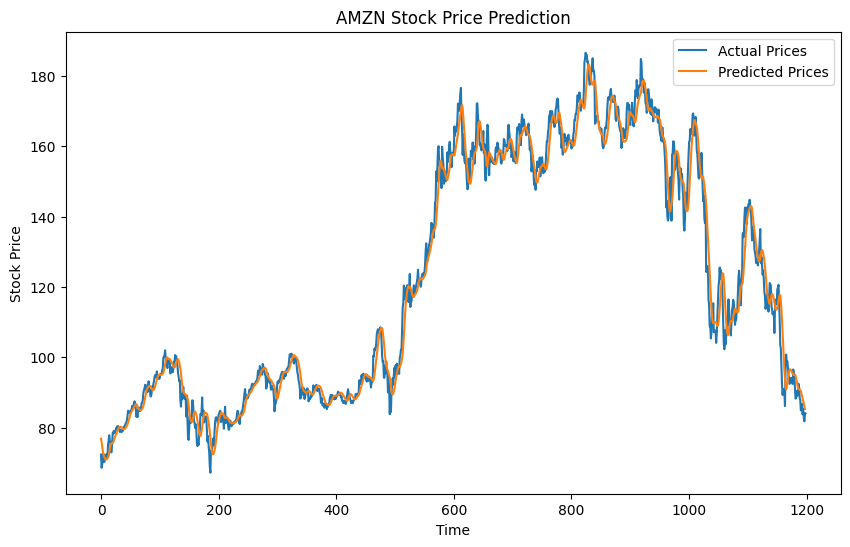

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 84ms/step - loss: 0.0706
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 56ms/step - loss: 0.0044
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0038
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 57ms/step - loss: 0.0030
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 69ms/step - loss: 0.0031
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 86ms/step - loss: 0.0030
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0024
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 57ms/step - loss: 0.0031
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 56ms/step - loss: 0.0029
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

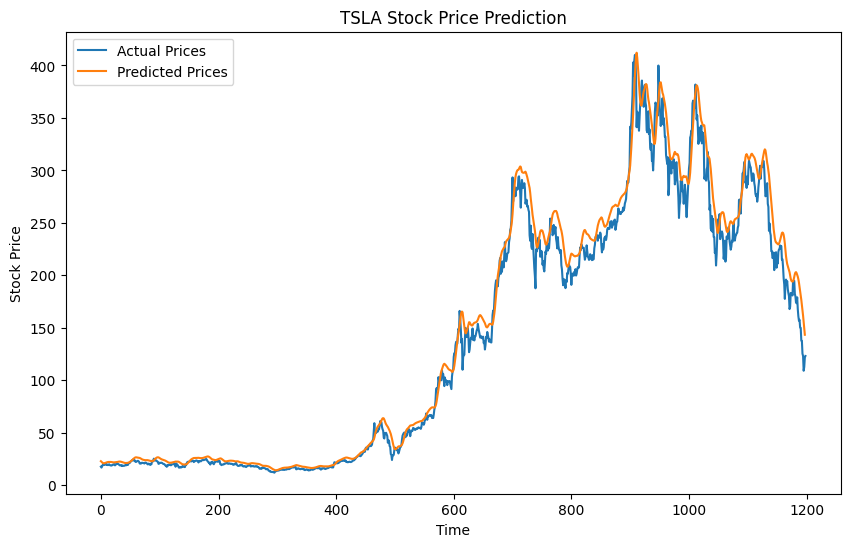

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 58ms/step - loss: 0.0877
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 57ms/step - loss: 0.0053
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 58ms/step - loss: 0.0042
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 84ms/step - loss: 0.0037
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 56ms/step - loss: 0.0035
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 57ms/step - loss: 0.0033
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 57ms/step - loss: 0.0034
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 65ms/step - loss: 0.0035
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 88ms/step - loss: 0.0034
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

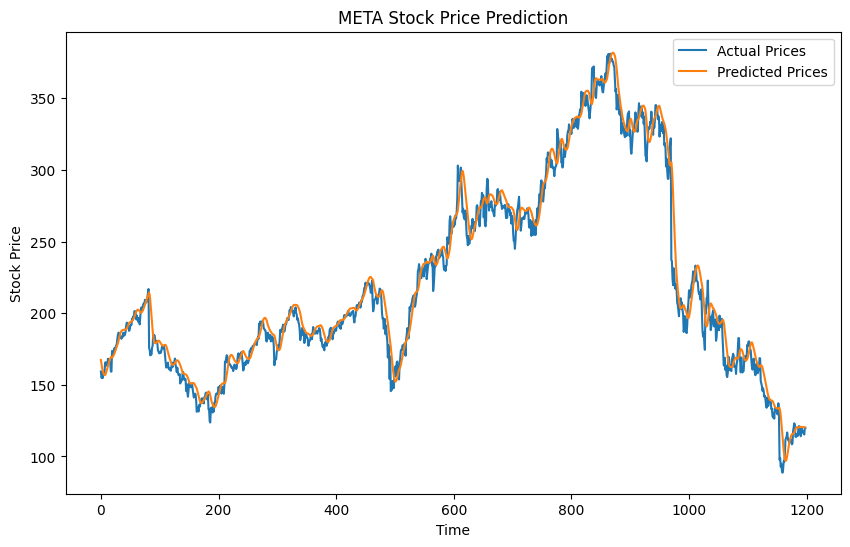

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 58ms/step - loss: 0.0467
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 79ms/step - loss: 0.0026
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 78ms/step - loss: 0.0025
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 56ms/step - loss: 0.0025
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 58ms/step - loss: 0.0024
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 57ms/step - loss: 0.0024
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 82ms/step - loss: 0.0025
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 57ms/step - loss: 0.0023
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 58ms/step - loss: 0.0023
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

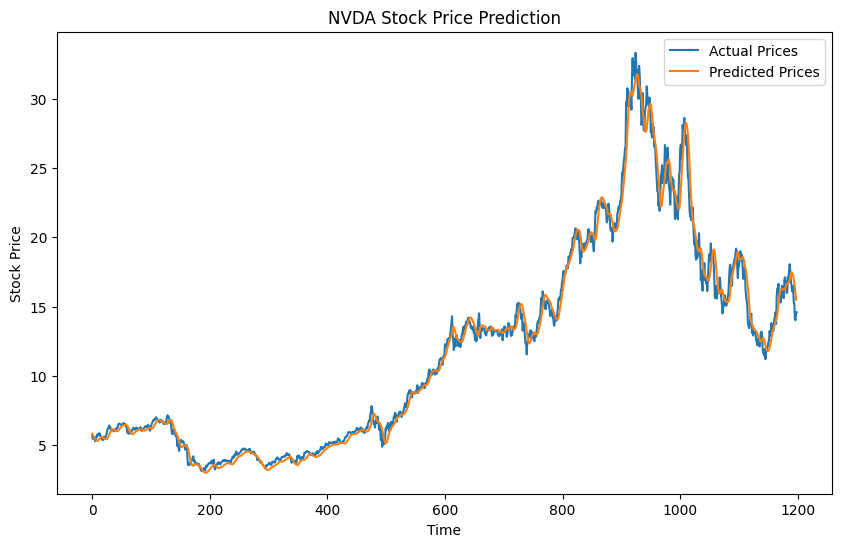

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 57ms/step - loss: 0.0599
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 57ms/step - loss: 0.0084
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 57ms/step - loss: 0.0065
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 57ms/step - loss: 0.0057
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 83ms/step - loss: 0.0052
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 57ms/step - loss: 0.0048
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 58ms/step - loss: 0.0057
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 57ms/step - loss: 0.0048
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 69ms/step - loss: 0.0051
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

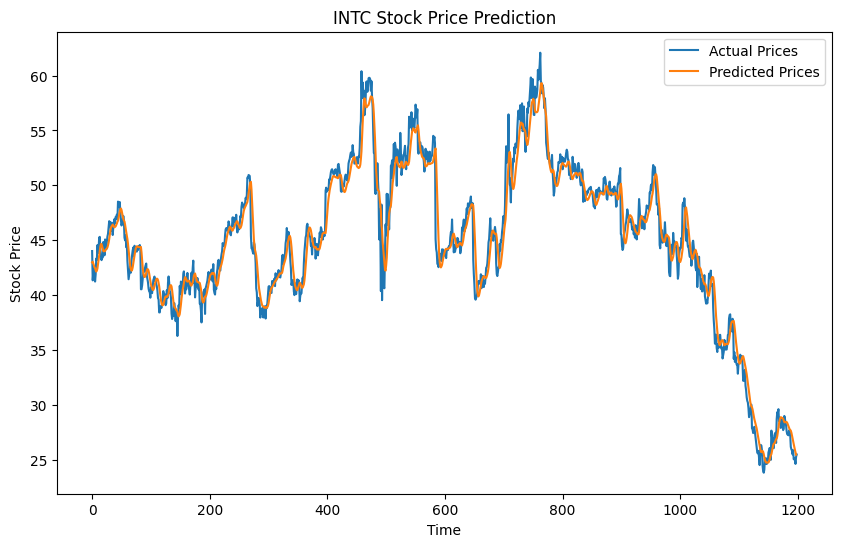

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 62ms/step - loss: 0.0666
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 83ms/step - loss: 0.0070
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 77ms/step - loss: 0.0045
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 59ms/step - loss: 0.0047
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 58ms/step - loss: 0.0046
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 63ms/step - loss: 0.0037
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 88ms/step - loss: 0.0039
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 62ms/step - loss: 0.0039
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 58ms/step - loss: 0.0039
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

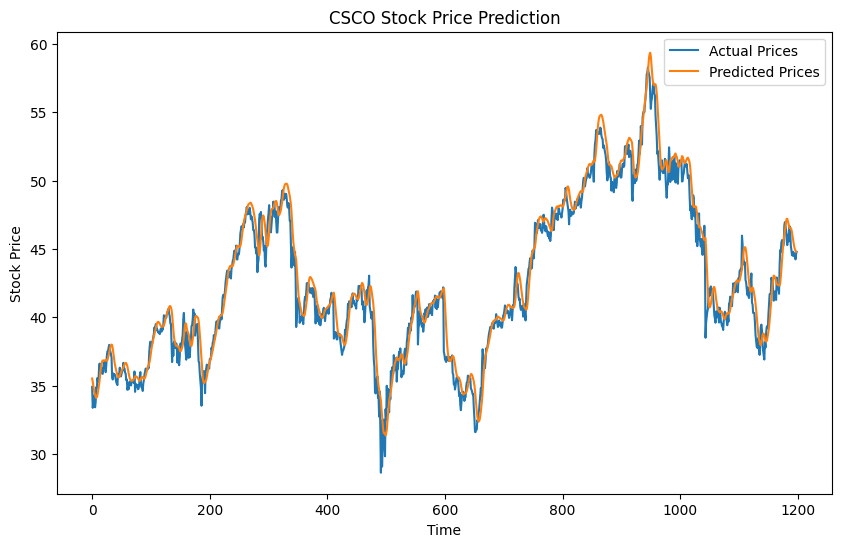

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 77ms/step - loss: 0.0803
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 79ms/step - loss: 0.0039
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 59ms/step - loss: 0.0040
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 59ms/step - loss: 0.0036
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 59ms/step - loss: 0.0029
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 63ms/step - loss: 0.0035
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 88ms/step - loss: 0.0022
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 58ms/step - loss: 0.0027
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 59ms/step - loss: 0.0029
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

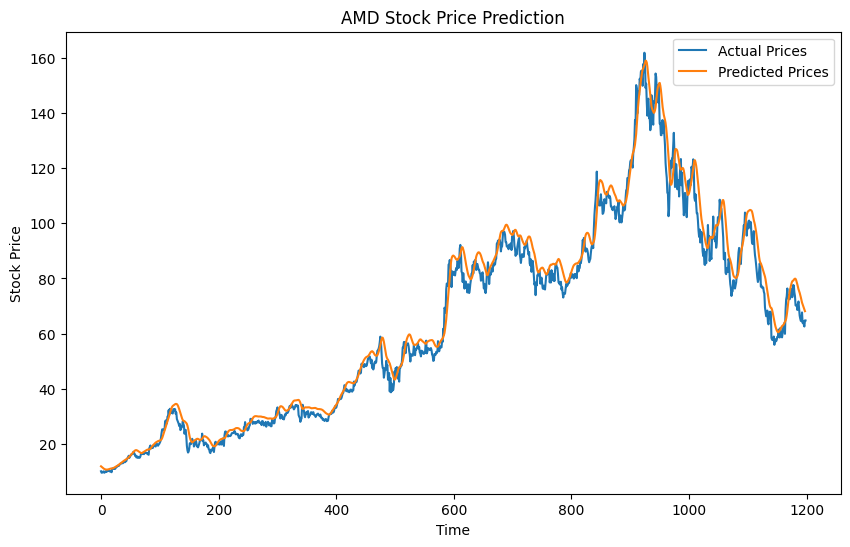

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 59ms/step - loss: 0.0687
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 90ms/step - loss: 0.0046
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 64ms/step - loss: 0.0035
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 60ms/step - loss: 0.0034
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 61ms/step - loss: 0.0031
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 60ms/step - loss: 0.0028
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 80ms/step - loss: 0.0027
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 80ms/step - loss: 0.0032
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 59ms/step - loss: 0.0027
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

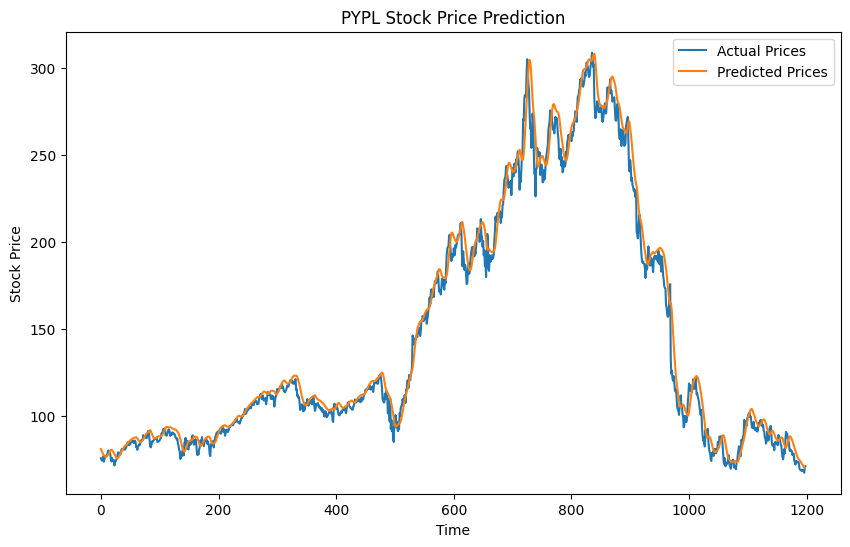

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 68ms/step - loss: 0.0620
Epoch 2/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 59ms/step - loss: 0.0058
Epoch 3/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 59ms/step - loss: 0.0044
Epoch 4/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 80ms/step - loss: 0.0041
Epoch 5/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 89ms/step - loss: 0.0045
Epoch 6/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 60ms/step - loss: 0.0042
Epoch 7/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 60ms/step - loss: 0.0038
Epoch 8/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 59ms/step - loss: 0.0034
Epoch 9/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 63ms/step - loss: 0.0033
Epoch 10/20
38/38 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

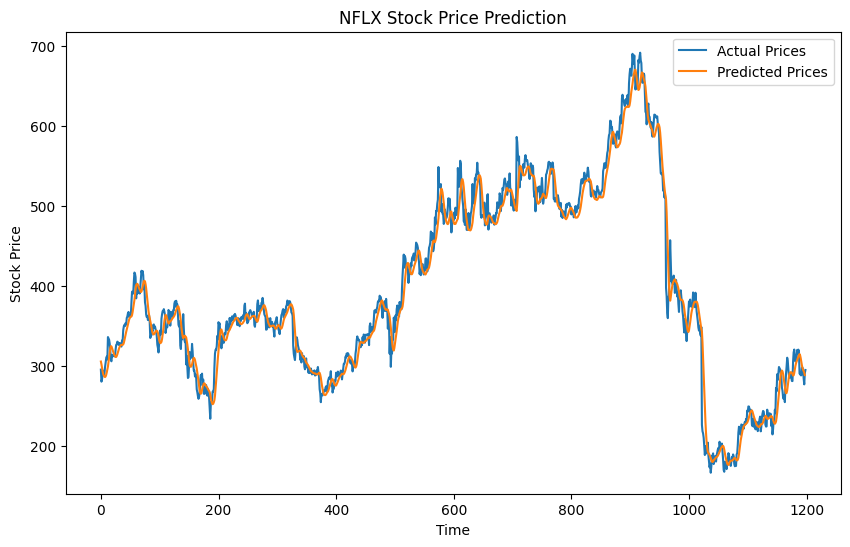

In [ ]:
# Train the LSTM model for each stock individually
for symbol in nasdaq_100_symbols:
    stock_data = adj_close[symbol].values
    stock_scaled = scaler.fit_transform(stock_data.reshape(-1, 1))

    X_stock, y_stock = create_dataset(stock_scaled, time_step)
    X_stock = np.reshape(X_stock, (X_stock.shape[0], X_stock.shape[1], 1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_stock.shape[1], X_stock.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_stock, y_stock, epochs=20, batch_size=32)

    # Make predictions
    predictions_stock = model.predict(X_stock)
    predictions_rescaled_stock = scaler.inverse_transform(predictions_stock)

    # Plot results for the stock (Example: AAPL)
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data[time_step:], label='Actual Prices')
    plt.plot(predictions_rescaled_stock, label='Predicted Prices')
    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


**Now I'm installling various libraries for sentiment analysis**

In [ ]:
pip install tweepy textblob yfinance pandas numpy matplotlib tensorflow scikit-learn


In [ ]:
pip install python-telegram-bot textblob vaderSentiment


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 661.5/661.5 kB 1.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
pip install yfinance pandas numpy matplotlib tensorflow scikit-learn tweepy textblob requests


I used **RapidAPI's Reddit Scraper** to gather data and perform sentiment analysis, so that I can modify the code to scrape Reddit posts via **RapidAPI** instead of using the **PRAW** library directly. **RapidAPI** provides an easy-to-use interface for accessing Reddit data, including post titles, comments, and more.

We'll be using the **Reddit Scraper API via RapidAPI** to search for relevant posts and then analyze their sentiment using **VADER.**

**Steps to Update:**
1. **API Setup:** We'll use the RapidAPI Reddit Scraper to fetch Reddit posts based on a keyword (stock symbol).
2. **Sentiment Analysis:** We'll continue using VADER to analyze the sentiment of each post.
3. **Request Handling:** We'll handle the API response and extract the post titles for sentiment analysis.

In [ ]:
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json

# RapidAPI credentials for Reddit Scraper
api_key = '4e0d6d9ce4msh3bc59dc2526XXXXXXXX0256jsn5653165127f2'
url = "https://reddit-scraper2.p.rapidapi.com/search_posts"

headers = {
    'x-rapidapi-host': "reddit-scraper2.p.rapidapi.com",
    'x-rapidapi-key': api_key
}

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to fetch Reddit posts from RapidAPI
def fetch_reddit_posts(stock_symbol, num_posts=10):
    querystring = {"query": stock_symbol, "limit": num_posts}

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        data = response.json()
        # Debugging: print the response
        print(f"Response for {stock_symbol}: {json.dumps(data, indent=4)}")

        if "data" in data:
            return data["data"]  # Return the list of posts
        else:
            print(f"No data found for {stock_symbol}.")
            return []
    else:
        print(f"Failed to fetch data for {stock_symbol}. Status Code: {response.status_code}")
        return []

# Function to analyze sentiment of Reddit posts
def analyze_sentiment_from_reddit(stock_symbol, num_posts=10):
    posts = fetch_reddit_posts(stock_symbol, num_posts)

    if not posts:
        return 0  # No posts, return neutral sentiment

    sentiments = []

    for post in posts:
        title = post.get('title', '')
        print(f"Analyzing post: {title}")

        # Get sentiment score of the post title
        sentiment_score = analyzer.polarity_scores(title)['compound']
        sentiments.append(sentiment_score)

    return sum(sentiments) / len(sentiments) if sentiments else 0

# Example usage for AAPL
average_sentiment = analyze_sentiment_from_reddit('AAPL', num_posts=10)
print(f"Average sentiment for AAPL: {average_sentiment}")


Response for AAPL: {
    "data": [
        {
            "author": {
                "icon": "",
                "id": "t2_mdf5xz6fg",
                "name": "Witty-Performance-23",
                "nsfw": false,
                "url": "https://www.reddit.com/user/Witty-Performance-23"
            },
            "comments": 456,
            "content": {
                "image": "",
                "link": "",
                "postThumbnail": "",
                "text": "Now I\u2019m not saying to sell all of your Apple stock immediately. However, given that:\n\n1. The Vision Pro was a dud, they\u2019re pulling back manufacturing/production\n\n2. iPhone sales are down almost 10%\n\n3. Services didn\u2019t grow as much as we thought they would\n\n4. Apple doing a buyback instead of investing more in R&D (it seems like they\u2019re doing a lot of buybacks lately..)\n\n5. Slow growth in critical markets like China\n\n6. No major product line releases in the future. The Vision Pro was a du

**Explanation of the above Code:**

**API Request:**

We send a GET request to the Reddit Scraper API on RapidAPI using the specified stock symbol as the search query **("query": stock_symbol).**
We also specify the limit to define the number of posts we want to retrieve **(default is 10)**.
The response includes post data that we can extract and use for sentiment analysis.

**Sentiment Analysis:**

We use **VADER** (Valence Aware Dictionary and sentiment Reasoner) to perform sentiment analysis. It calculates a sentiment score for each post, where:

**Positive Sentiment: score > 0**

**Negative Sentiment: score < 0**

**Neutral Sentiment: score ‚âà 0**

The compound score (compound) gives an aggregated sentiment score ranging from -1 (negative) to 1 (positive).

**Response Handling:**

If the API request is successful (status code 200), we extract the data field from the response, which contains the list of posts.
We loop through each post, analyze the sentiment of the post title, and calculate the average sentiment for the given stock symbol.

**Printing Results:**

After fetching the posts and calculating the sentiment for the stock (e.g., AAPL), we print the average sentiment score.
________________________________________________________________________

**Integrating Sentiment Data into an LSTM Model for Stock Prediction**

Now that you have sentiment data from Reddit for specific stocks (e.g., AAPL), let's integrate this sentiment as an additional feature for your **LSTM (Long Short-Term Memory)** model. The goal is to create a model that predicts stock price movements based on both historical stock data (e.g., Open, Close, High, Low prices) and the sentiment extracted from Reddit posts.

Here's how I integrated the sentiment data into the model:

**Steps to Integrate Sentiment Data:**

1. **Gather Stock Price Data:**

Use an API (like Yahoo Finance) to gather historical stock price data.

2. **Add Sentiment Data:**

For each stock symbol, fetch the sentiment data from Reddit using the RapidAPI-based scraper.
Merge sentiment scores with stock price data on the date of the stock data.

3. **Preprocess the Data:**

Normalize both the sentiment data and stock price data.
Split the data into training and test datasets.

4. **Create LSTM Model:**

Build an LSTM model that uses both the stock price data and sentiment as input features.

5. **Train and Evaluate the Model:**

Train the model and evaluate it using metrics such as accuracy, RMSE, precision, and recall.

In [ ]:
import numpy as np
import pandas as pd
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# RapidAPI credentials for Reddit Scraper
api_key = '4e0d6d9ce4msh3bc59dXXXXXXXX7ep170256jsn5653165127f2'
url = "https://reddit-scraper2.p.rapidapi.com/search_posts"
headers = {
    'x-rapidapi-host': "reddit-scraper2.p.rapidapi.com",
    'x-rapidapi-key': api_key
}

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to fetch Reddit posts from RapidAPI
def fetch_reddit_posts(stock_symbol, num_posts=10):
    querystring = {"query": stock_symbol, "limit": num_posts}
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        data = response.json()
        if "data" in data:
            return data["data"]  # Return the list of posts
        else:
            return []
    else:
        return []

# Function to analyze sentiment of Reddit posts
def analyze_sentiment_from_reddit(stock_symbol, num_posts=10):
    posts = fetch_reddit_posts(stock_symbol, num_posts)
    if not posts:
        return 0  # No posts, return neutral sentiment

    sentiments = []
    for post in posts:
        title = post.get('title', '')
        sentiment_score = analyzer.polarity_scores(title)['compound']
        sentiments.append(sentiment_score)

    return sum(sentiments) / len(sentiments) if sentiments else 0

# Function to fetch historical stock data (Yahoo Finance)
def fetch_stock_data(stock_symbol, start_date='2022-01-01', end_date='2024-01-01'):
    import yfinance as yf
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Function to prepare data for LSTM model
def prepare_data_for_lstm(stock_symbol, num_posts=10):
    # Fetch stock price data
    stock_data = fetch_stock_data(stock_symbol)

    # Add sentiment data
    stock_data['Sentiment'] = stock_data.index.map(lambda x: analyze_sentiment_from_reddit(stock_symbol, num_posts))

    # Drop missing values (if any)
    stock_data.dropna(inplace=True)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']])

    # Prepare sequences for LSTM
    X, y = [], []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i])  # Last 60 days of data
        y.append(scaled_data[i, 3])    # Predict the 'Close' price

    X = np.array(X)
    y = np.array(y)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_train, X_test, y_train, y_test, scaler

# Build and compile LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))  # Predicting the 'Close' price
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_and_evaluate_model(stock_symbol, num_posts=10):
    # Prepare the data
    X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm(stock_symbol, num_posts)

    # Build the model
    model = build_lstm_model(X_train.shape[1:])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    test_loss = model.evaluate(X_test, y_test)
    print(f"Test Loss (MSE): {test_loss}")

    return model, scaler

# Example usage for AAPL (Apple Inc.)
model, scaler = train_and_evaluate_model('AAPL', num_posts=10)


[*********************100%***********************]  1 of 1 completed


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 89ms/step - loss: 0.0625 - val_loss: 0.0182
Epoch 2/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 79ms/step - loss: 0.0111 - val_loss: 0.0052
Epoch 3/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 82ms/step - loss: 0.0074 - val_loss: 0.0087
Epoch 4/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 82ms/step - loss: 0.0067 - val_loss: 0.0043
Epoch 5/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 84ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 6/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 66ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 7/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 47ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 8/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 52ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 9/10


**Explanation of the Code:**

1. **Fetching Reddit Posts:**

Using RapidAPI's Reddit Scraper to get posts related to a given stock symbol (AAPL).
We use the VADER sentiment analysis tool to compute the sentiment score for each post.

2. **Stock Data:**

Using Yahoo Finance (yfinance) to fetch historical stock data (Open, Close, High, Low, Volume).

3. **Data Preprocessing:**

Sentiment data is merged with stock data, and then MinMaxScaler is used to scale both stock prices and sentiment values to a range between 0 and 1.

4. **LSTM Model:**

The LSTM model is designed with two LSTM layers followed by a Dense layer to predict the stock's Close price.
The model is trained on 60 days' worth of historical data to predict the next day's closing price.

5. **Training and Evaluation:**

The model is trained on the training dataset (X_train, y_train) and evaluated on the test dataset (X_test, y_test).

______________________________________________________________________

**Next Steps to Improve the Stock Prediction Model Using LSTM**


**Hyperparameter Tuning:**

We will try different combinations of hyperparameters for the LSTM model, such as the number of layers, the number of neurons, and the learning rate.

In [ ]:
!apt-get install -y libta-lib0 libta-lib0-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libta-lib0
E: Unable to locate package libta-lib0-dev


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
%cd ..
!pip install TA-Lib

--2024-12-06 13:14:12--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:c95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.12.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-12-06 13:14:12--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:c95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-12-06 13:14:13--  http://cfhcable.dl.sour

1. **Hyperparameter Tuning**

We'll try different model configurations, e.g., the number of neurons in LSTM layers, number of epochs, and batch sizes. We can use Grid Search or Random Search for hyperparameter tuning. However, for simplicity, we'll start by manually testing different configurations.

2. **Adding Technical Indicators**

We'll use popular technical indicators such as:

**Simple Moving Average (SMA)**

**Relative Strength Index (RSI)**

**Exponential Moving Average (EMA)**

These indicators can be useful in forecasting stock prices as they capture trends and overbought/oversold conditions.

3. **Model Evaluation**

We'll calculate different performance metrics and visualize the results.

[*********************100%***********************]  1 of 1 completed


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 133ms/step - loss: 0.1305 - val_loss: 0.0968
Epoch 2/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 97ms/step - loss: 0.0207 - val_loss: 0.0044
Epoch 3/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 136ms/step - loss: 0.0079 - val_loss: 0.0083
Epoch 4/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 182ms/step - loss: 0.0065 - val_loss: 0.0125
Epoch 5/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 95ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 6/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 98ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 7/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 95ms/step - loss: 0.0049 - val_loss: 0.0073
Epoch 8/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 97ms/step - loss: 0.0045 - val_loss: 0.0055
Epoch 9/

[*********************100%***********************]  1 of 1 completed

Test Loss (MSE): 0.002927227411419153


14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 49ms/step


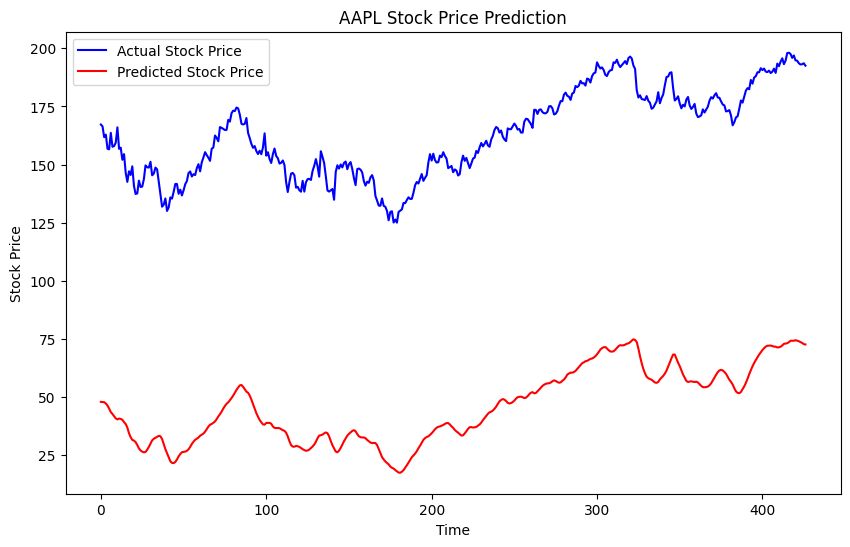

In [ ]:
import numpy as np
import pandas as pd
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
!pip install TA-Lib
import talib as ta  # Technical Analysis library for indicators

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to fetch Reddit posts from RapidAPI
def fetch_reddit_posts(stock_symbol, num_posts=10):
    querystring = {"query": stock_symbol, "limit": num_posts}
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        data = response.json()
        if "data" in data:
            return data["data"]  # Return the list of posts
        else:
            return []
    else:
        return []

# Function to analyze sentiment of Reddit posts
def analyze_sentiment_from_reddit(stock_symbol, num_posts=10):
    posts = fetch_reddit_posts(stock_symbol, num_posts)
    if not posts:
        return 0  # No posts, return neutral sentiment

    sentiments = []
    for post in posts:
        title = post.get('title', '')
        sentiment_score = analyzer.polarity_scores(title)['compound']
        sentiments.append(sentiment_score)

    return sum(sentiments) / len(sentiments) if sentiments else 0

# Function to fetch historical stock data (Yahoo Finance)
def fetch_stock_data(stock_symbol, start_date='2022-01-01', end_date='2024-01-01'):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Adding Technical Indicators (e.g., SMA, RSI, EMA)
def add_technical_indicators(df):

    close_prices = df['Close'].to_numpy().flatten()

    # Use talib functions directly instead of ta.trend
    df['SMA'] = ta.SMA(close_prices, timeperiod=14)
    df['EMA'] = ta.EMA(close_prices, timeperiod=14)
    df['RSI'] = ta.RSI(close_prices, timeperiod=14)
    return df

# Function to prepare data for LSTM model
def prepare_data_for_lstm(stock_symbol, num_posts=10):
    # Fetch stock price data
    stock_data = fetch_stock_data(stock_symbol)

    # Add sentiment data
    stock_data['Sentiment'] = stock_data.index.map(lambda x: analyze_sentiment_from_reddit(stock_symbol, num_posts))

    # Add technical indicators
    stock_data = add_technical_indicators(stock_data)

    # Drop missing values (if any)
    stock_data.dropna(inplace=True)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'SMA', 'EMA', 'RSI']])

    # Prepare sequences for LSTM
    X, y = [], []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i])  # Last 60 days of data
        y.append(scaled_data[i, 3])    # Predict the 'Close' price

    X = np.array(X)
    y = np.array(y)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_train, X_test, y_train, y_test, scaler

# Build and compile LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dense(units=1))  # Predicting the 'Close' price
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_and_evaluate_model(stock_symbol, num_posts=10):
    # Prepare the data
    X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm(stock_symbol, num_posts)

    # Build the model
    model = build_lstm_model(X_train.shape[1:])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    test_loss = model.evaluate(X_test, y_test)
    print(f"Test Loss (MSE): {test_loss}")

    return model, scaler

# Visualize predictions vs. actual stock prices
def visualize_predictions(stock_symbol, model, scaler, num_posts=10):
    # Fetch stock data for visualization
    stock_data = fetch_stock_data(stock_symbol)
    stock_data['Sentiment'] = stock_data.index.map(lambda x: analyze_sentiment_from_reddit(stock_symbol, num_posts))
    stock_data = add_technical_indicators(stock_data)
    stock_data.dropna(inplace=True)

    # Normalize the data for prediction
    scaled_data = scaler.transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'SMA', 'EMA', 'RSI']])

    # Prepare test data for prediction
    X = []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i])

    X = np.array(X)
    predictions = model.predict(X)

    # Inverse scaling to get actual prices
    predictions = scaler.inverse_transform(np.concatenate([np.zeros((predictions.shape[0], X.shape[2]-1)), predictions], axis=1))[:, -1]
    actual = stock_data['Close'][60:].values

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predictions, color='red', label='Predicted Stock Price')
    plt.title(f'{stock_symbol} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Example usage for AAPL (Apple Inc.)
model, scaler = train_and_evaluate_model('AAPL', num_posts=10)
visualize_predictions('AAPL', model, scaler)


**Key Additions in the above Code:**

**Technical Indicators:**

SMA (Simple Moving Average): Captures price trends.

EMA (Exponential Moving Average): Places more weight on recent data points.

RSI (Relative Strength Index): Measures overbought or oversold conditions.

**Hyperparameter Tuning:**

I increased the number of neurons in the LSTM layers (100 neurons each) for potentially better learning.
Set epochs=20 to allow more training.

**Visualization:**

After training the model, predictions are visualized against the actual stock prices to help evaluate the model's performance.

_____________________________________________________________________________

**Implement Cross-Validation to Improve Model Performance**

Cross-validation is a crucial technique for evaluating machine learning models. It helps to assess the performance of the model by training it on different subsets of the data, ensuring that the model generalizes well to unseen data.

For time-series forecasting (like stock price prediction), we should be careful when splitting the data, as time series data has a temporal order. A TimeSeriesSplit method should be used rather than a random split. This method ensures that future data points are not used to predict past ones.

Here‚Äôs how we can integrate cross-validation into the LSTM model training process.

**Steps for Cross-Validation**

1. Split the data into time-series folds using TimeSeriesSplit from scikit-learn.

2. Train and evaluate the model on each fold of the data.

3. Calculate average performance metrics (e.g., Mean Squared Error) across all folds.

4. Use these results to determine the best model configuration and reduce overfitting.

In [ ]:
import numpy as np
import pandas as pd
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit # Import TimeSeriesSplit
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
!pip install TA-Lib
import talib as ta  # Technical Analysis library for indicators
from sklearn.metrics import mean_squared_error  # Import mean_squared_error


def cross_validate_lstm(stock_symbol, num_posts=10, n_splits=5):
    # Prepare the data
    X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm(stock_symbol, num_posts)

    # TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=n_splits)
    X = np.concatenate([X_train, X_test])
    y = np.concatenate([y_train, y_test])


    mse_scores = []  # Store Mean Squared Error for each fold
    for train_index, test_index in tscv.split(X):
        # Split the data into training and testing sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build and train the model
        model = build_lstm_model(X_train.shape[1:])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Make predictions and calculate MSE
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        mse_scores.append(mse)

    # Calculate average MSE across all folds
    avg_mse = np.mean(mse_scores)
    print(f"Average MSE across {n_splits} folds: {avg_mse}")

    return avg_mse

# Example usage for AAPL (Apple Inc.)
avg_mse = cross_validate_lstm('AAPL', num_posts=10, n_splits=5)
print(f"Cross-Validation MSE: {avg_mse}")


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 148ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 329ms/step

3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 154ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 162ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 150ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 152ms/step
Average MSE across 5 folds: 0.005472869078551484
Cross-Validation MSE: 0.005472869078551484


**Explanation of Key Changes:**

**TimeSeriesSplit for Cross-Validation:**

We use TimeSeriesSplit from scikit-learn to divide the data into n_splits folds. This ensures that each training set only contains data from the past, and test data comes from the future (important for time series forecasting).

**MSE Calculation:**

For each fold, the model is trained on the training set and evaluated on the test set using Mean Squared Error (MSE). The MSE scores from each fold are averaged to give an overall performance measure of the model.

**Model Training:**

Each fold is used to train the LSTM model, and predictions are made on the corresponding test set. The loss (MSE) is calculated and stored for each fold.

**Model Evaluation:**

After cross-validation, the average MSE is printed as a measure of model performance across all folds. A lower MSE indicates better performance.

_______________________________________________________________________

In [ ]:
pip install keras-tuner


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


**Hyperparameter Tuning Using Keras Tuner**

In [ ]:
import keras_tuner as kt
from tensorflow.keras.layers import Dropout
import numpy as np # Added import

# Function to build the LSTM model with tunable hyperparameters
def build_tuned_lstm_model(hp, input_shape): # Added input_shape as argument
    model = Sequential()

    # Add LSTM layers with tunable hyperparameters
    model.add(LSTM(units=hp.Int('units_1', min_value=50, max_value=200, step=50),
                   return_sequences=True, input_shape=input_shape)) # Use input_shape argument
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(LSTM(units=hp.Int('units_2', min_value=50, max_value=200, step=50),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model with a tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam( # Changed to tf.keras.optimizers
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='mean_squared_error'
    )

    return model

# Hyperparameter tuning using Keras Tuner
def cross_validate_lstm(stock_symbol, num_posts=10, n_splits=5):
    # Prepare the data
    X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm(stock_symbol, num_posts)
    X = np.concatenate([X_train, X_test])
    y = np.concatenate([y_train, y_test])

    # Split data into training and testing
    X_train, X_test, y_train, y_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

    # Get input shape for the model
    input_shape = (X_train.shape[1], X_train.shape[2])

    # Initialize the Keras Tuner
    tuner = kt.Hyperband(
        lambda hp: build_tuned_lstm_model(hp, input_shape), # Pass input_shape to build_tuned_lstm_model
        objective='val_loss',  # Minimize validation loss
        max_epochs=10,
        factor=3,
        directory='hyperparameter_tuning',
        project_name='lstm_stock_tuning'
    )

    # Search for the best hyperparameters
    tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Get the best model and hyperparameters
    best_model = tuner.get_best_models(num_models=1)[0]
    # Use get_best_hyperparameters instead of get_best_trials
    best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Print the best hyperparameters
    print("Best Hyperparameters:", best_hp.values)

    return best_model, best_hp
best_model, best_hp = cross_validate_lstm('AAPL', num_posts=10, n_splits=5) # Changed this line

# Prepare the data to get X_test and y_test
X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm('AAPL', num_posts=10)
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# Split data into training and testing to get X_test and y_test for evaluation
X_train, X_test, y_train, y_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

# Evaluate the best model using the X_test and y_test defined above
loss = best_model.evaluate(X_test, y_test)
print(f"Best model loss: {loss}")

[*********************100%***********************]  1 of 1 completed


Reloading Tuner from hyperparameter_tuning/lstm_stock_tuning/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
[*********************100%***********************]  1 of 1 completed

Best Hyperparameters: {'units_1': 150, 'dropout_1': 0.4, 'units_2': 150, 'dropout_2': 0.2, 'learning_rate': 0.006551697374456346, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 63ms/step - loss: 0.0028
Best model loss: 0.002477318048477173


**Explanation of the above code:**

**Keras Tuner:**

The build_tuned_lstm_model function defines the LSTM model and uses hyperparameters provided by Keras Tuner. These hyperparameters include:
units_1, units_2: The number of LSTM units in each LSTM layer.
dropout_1, dropout_2: Dropout rates after each LSTM layer.
learning_rate: The learning rate for the Adam optimizer.

**Hyperparameter Search:**

Hyperband is used as the search algorithm. It's an efficient way to find the best set of hyperparameters, and it automatically stops less promising trials early to save time.
The objective is set to minimize the val_loss (validation loss), which is the mean squared error.

**Search for Optimal Hyperparameters:**

The search() function runs the tuning process for a specified number of epochs and batch size, tuning the model's hyperparameters.
The best model is selected, and the corresponding hyperparameters are printed.

**Model Evaluation:**

The best model is evaluated on the test data, and the loss (MSE) is printed.

________________________________________________________________________

**Model Training and Evaluation**

Now that we've tuned the LSTM model with hyperparameters, the next step is to proceed with the training of the model using the best-found hyperparameters. This will involve:

1. Training the LSTM model with the optimal hyperparameters.

2. Evaluating the model's performance using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and possibly R¬≤ (coefficient of determination) for stock price prediction accuracy.

3. Making predictions using the trained model.

4. Visualizing the performance to understand how well the model is performing over time.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Reloading Tuner from hyperparameter_tuning/lstm_stock_tuning/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: {'units_1': 150, 'dropout_1': 0.4, 'units_2': 150, 'dropout_2': 0.2, 'learning_rate': 0.006551697374456346, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Epoch 1/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 239ms/step - loss: 0.1550 - val_loss: 0.0467
Epoch 2/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 209ms/step - loss: 0.0245 - val_loss: 0.0206
Epoch 3/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 209ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 4/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 230ms/step - loss: 0.0110 - val_loss: 0.0126
Epoch 5/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 373ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 6/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 254ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 7/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚

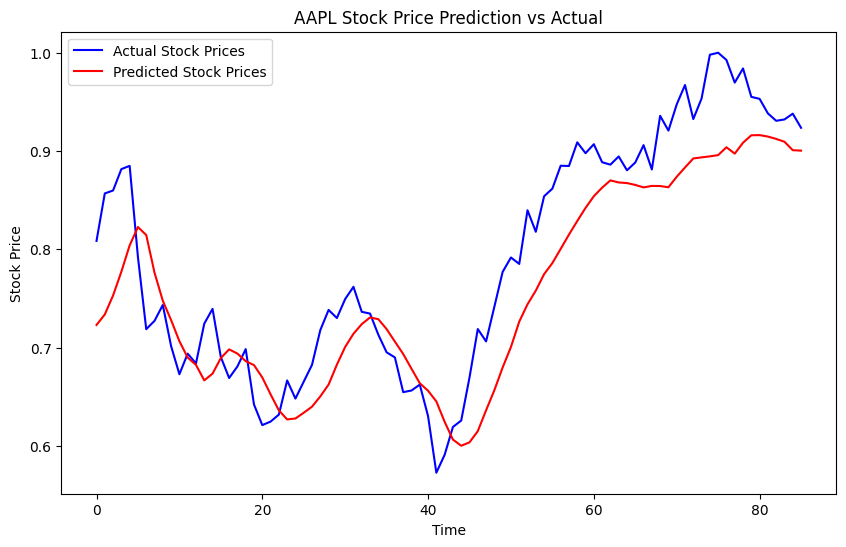

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Function to train the LSTM model using the best hyperparameters
def train_lstm_model(stock_symbol, num_posts=10, n_splits=5):
    # Prepare the data
    # The prepare_data_for_lstm function returns 5 values, so you need to unpack them accordingly
    X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm(stock_symbol, num_posts)

    # Concatenate train and test data for a single X and y
    X = np.concatenate([X_train, X_test])
    y = np.concatenate([y_train, y_test])

    # Split data into training and testing
    X_train, X_test, y_train, y_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

    # Initialize the best model from the previous tuning
    # Assuming cross_validate_lstm now returns best_model, best_hp
    best_model, _ = cross_validate_lstm(stock_symbol, num_posts, n_splits) # Changed to call cross_validate_lstm

    # Train the model with the training data
    history = best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Model evaluation
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Evaluation Metrics for {stock_symbol}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R2 Score: {r2}")

    # Visualizing the prediction vs actual data
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, color='blue', label='Actual Stock Prices')
    plt.plot(y_pred, color='red', label='Predicted Stock Prices')
    plt.title(f"{stock_symbol} Stock Price Prediction vs Actual")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

    return best_model, history

# Example usage for training and evaluating the model for AAPL stock
best_model, history = train_lstm_model('AAPL', num_posts=10, n_splits=5)

**Explanation of the Code:**

**Data Preparation:**

The function prepare_data_for_lstm preprocesses the data, prepares it for LSTM training, and scales it.

**Model Training:**

The function train_lstm_model uses the best_model (the model tuned with the best hyperparameters from Keras Tuner) and fits it on the training data (X_train, y_train).
The model is trained for 10 epochs, with a batch size of 32. You can adjust the number of epochs based on your requirements or dataset size.

**Model Evaluation:**

After training, the model's performance is evaluated on the test set (X_test, y_test) using:

**Mean Squared Error (MSE):** Measures the average squared difference between the predicted and actual values.

**Mean Absolute Error (MAE):** Measures the average absolute difference between predicted and actual values.

**R¬≤ Score:** Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

**Visualization:**

A plot is generated that shows Actual Stock Prices vs Predicted Stock Prices over time, helping visualize the model's predictions.

_________________________________________________________________________

**Using RapidAPI's Reddit Scraper to gather data for other stock such as Google and Microsoft.**

We get the average sentiment for Google and Microsoft

In [ ]:
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json

# RapidAPI credentials for Reddit Scraper
api_key = '64f9f0a84dmsh37f26582e1157XXXXXXXXXXXX8fjsn4c55d1a408c1'
url = "https://reddit-scraper2.p.rapidapi.com/search_posts"

headers = {
    'x-rapidapi-host': "reddit-scraper2.p.rapidapi.com",
    'x-rapidapi-key': api_key
}

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to fetch Reddit posts from RapidAPI
def fetch_reddit_posts(stock_symbol, num_posts=10):
    querystring = {"query": stock_symbol, "limit": num_posts}

    response = requests.get(url, headers=headers, params=querystring)

    if response.status_code == 200:
        data = response.json()
        # Debugging: print the response
        print(f"Response for {stock_symbol}: {json.dumps(data, indent=4)}")

        if "data" in data:
            return data["data"]  # Return the list of posts
        else:
            print(f"No data found for {stock_symbol}.")
            return []
    else:
        print(f"Failed to fetch data for {stock_symbol}. Status Code: {response.status_code}")
        return []

# Function to analyze sentiment of Reddit posts
def analyze_sentiment_from_reddit(stock_symbol, num_posts=10):
    posts = fetch_reddit_posts(stock_symbol, num_posts)

    if not posts:
        return 0  # No posts, return neutral sentiment

    sentiments = []

    for post in posts:
        title = post.get('title', '')
        print(f"Analyzing post: {title}")

        # Get sentiment score of the post title
        sentiment_score = analyzer.polarity_scores(title)['compound']
        sentiments.append(sentiment_score)

    return sum(sentiments) / len(sentiments) if sentiments else 0

# Example usage for AAPL
average_sentiment_Google = analyze_sentiment_from_reddit('GOOG', num_posts=10)
print(f"Average sentiment for GOOG: {average_sentiment_Google}")

average_sentiment_Microsoft = analyze_sentiment_from_reddit('MSFT', num_posts=10)
print(f"Average sentiment for MSFT: {average_sentiment_Microsoft}")

Response for GOOG: {
    "data": [
        {
            "author": {
                "icon": "https://www.redditstatic.com/avatars/defaults/v2/avatar_default_0.png",
                "id": "t2_12uetc",
                "name": "krs8785",
                "nsfw": false,
                "url": "https://www.reddit.com/user/krs8785"
            },
            "comments": 476,
            "content": {
                "image": "",
                "link": "",
                "postThumbnail": "https://b.thumbs.redditmedia.com/FIIINn1WZMekcjmwJ-hqUk7na8xSNUqBiATkit4T56I.jpg",
                "text": "Google is the best stock to invest in during this time. With market down and the anti trust lawsuit pulling the stock down, this is a good time to invest in google. It will be bounce back once the dust is settled.\n\nYOLO\n\n25K in FID account as well. Total 50k IN.\n\n\n\n![img](847j6jfmssnd1)\n\n",
                "video": "",
                "videoThumbnail": ""
            },
            "contentL

Since the API is limited I can only get the MSE for Google stocks.

In [ ]:
modelGoogle, scalerGoogle = train_and_evaluate_model('GOOG', num_posts=10)
modelMicrosoft, scalerMicrosoft = train_and_evaluate_model('MSFT', num_posts=10)

[*********************100%***********************]  1 of 1 completed


Streaming output truncated to the last 5000 lines.
            "content": {
                "image": "",
                "link": "",
                "postThumbnail": "",
                "text": "I\u2019m surprised more people aren\u2019t talking about it. I mean, it\u2019s literally google, not going anywhere. With the advancements of AI, they are bound to create some cool technology, and they got hit pretty hard over the past year. I think a comeback is inevitable. Being far from it\u2019s all time high, I think it\u2019s the most obvious purchase in the stock market now. ",
                "video": "",
                "videoThumbnail": ""
            },
            "contentLanguage": "en",
            "creationDate": "2024-10-20T00:58:16.569000+0000",
            "id": "t3_1g7nagu",
            "nsfw": false,
            "score": 564,
            "subreddit": {
                "banner": "https://styles.redditmedia.com/t5_2qjfk/styles/bannerBackgroundImage_p8i1ia9nxvc11.png?width=390&

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 140ms/step - loss: 0.0713 - val_loss: 0.0387
Epoch 2/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 102ms/step - loss: 0.0093 - val_loss: 0.0232
Epoch 3/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 152ms/step - loss: 0.0071 - val_loss: 0.0062
Epoch 4/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 152ms/step - loss: 0.0054 - val_loss: 0.0137
Epoch 5/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 100ms/step - loss: 0.0048 - val_loss: 0.0141
Epoch 6/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 101ms/step - loss: 0.0046 - val_loss: 0.0074
Epoch 7/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 102ms/step - loss: 0.0038 - val_loss: 0.0070
Epoch 8/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 102ms/step - loss: 0.0038 - val_loss: 0.0093
Epo

[*********************100%***********************]  1 of 1 completed


Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Code: 429
Failed to fetch data for MSFT. Status Co

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 139ms/step - loss: 0.0592 - val_loss: 0.0842
Epoch 2/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 102ms/step - loss: 0.0100 - val_loss: 0.0086
Epoch 3/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 102ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 4/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 125ms/step - loss: 0.0033 - val_loss: 0.0083
Epoch 5/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 149ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 6/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 158ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 7/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 120ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 8/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 102ms/step - loss: 0.0026 - val_loss: 0.0033
Epo

**Integrating Sentiment Data into an LSTM Model for Stock Prediction for GOOGLE**

[*********************100%***********************]  1 of 1 completed


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 179ms/step - loss: 0.0376 - val_loss: 0.0370
Epoch 2/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 164ms/step - loss: 0.0070 - val_loss: 0.0288
Epoch 3/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 97ms/step - loss: 0.0063 - val_loss: 0.0068
Epoch 4/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 96ms/step - loss: 0.0047 - val_loss: 0.0077
Epoch 5/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 98ms/step - loss: 0.0044 - val_loss: 0.0101
Epoch 6/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 97ms/step - loss: 0.0039 - val_loss: 0.0066
Epoch 7/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 98ms/step - loss: 0.0038 - val_loss: 0.0082
Epoch 8/20
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 97ms/step - loss: 0.0030 - val_loss: 0.0077
Epoch 9/2

[*********************100%***********************]  1 of 1 completed

Test Loss (MSE): 0.0035437578335404396


14/14 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 75ms/step


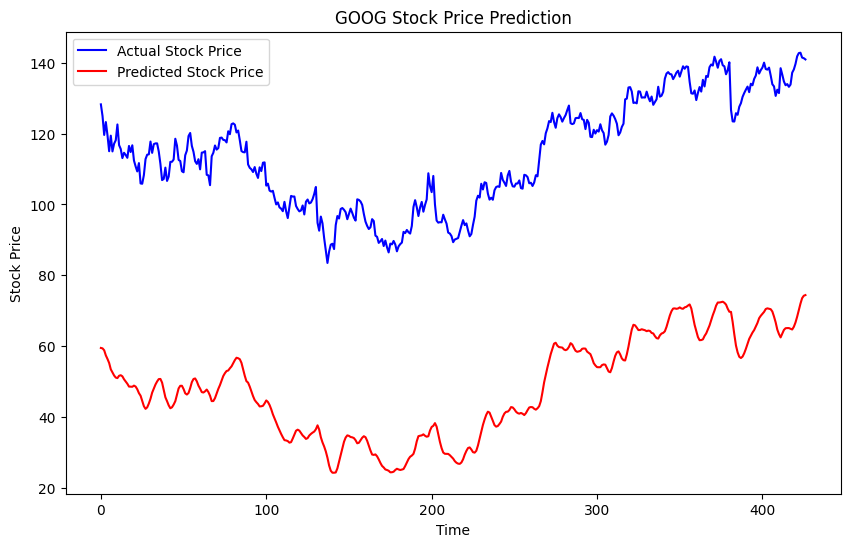

In [ ]:
api_key = '4c83acc98msh12cfe78e2XXXXXXXXXXXXXXXXX2299bf60d36'
url = "https://reddit-scraper2.p.rapidapi.com/search_posts"

headers = {
    'x-rapidapi-host': "reddit-scraper2.p.rapidapi.com",
    'x-rapidapi-key': api_key
}

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to fetch Reddit posts from RapidAPI
def fetch_reddit_posts(stock_symbol, num_posts=10):
    querystring = {"query": stock_symbol, "limit": num_posts}
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        data = response.json()
        if "data" in data:
            return data["data"]  # Return the list of posts
        else:
            return []
    else:
        return []

# Function to analyze sentiment of Reddit posts
def analyze_sentiment_from_reddit(stock_symbol, num_posts=10):
    posts = fetch_reddit_posts(stock_symbol, num_posts)
    if not posts:
        return 0  # No posts, return neutral sentiment

    sentiments = []
    for post in posts:
        title = post.get('title', '')
        sentiment_score = analyzer.polarity_scores(title)['compound']
        sentiments.append(sentiment_score)

    return sum(sentiments) / len(sentiments) if sentiments else 0

# Function to fetch historical stock data (Yahoo Finance)
def fetch_stock_data(stock_symbol, start_date='2022-01-01', end_date='2024-01-01'):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Adding Technical Indicators (e.g., SMA, RSI, EMA)
def add_technical_indicators(df):
    # Ensure 'Close' is a 1-dimensional array
    close_prices = df['Close'].to_numpy().flatten()  # Convert to float and ensure 1D

    # Use talib functions directly instead of ta.trend
    df['SMA'] = ta.SMA(close_prices, timeperiod=14)
    df['EMA'] = ta.EMA(close_prices, timeperiod=14)
    df['RSI'] = ta.RSI(close_prices, timeperiod=14)
    return df

# Function to prepare data for LSTM model
def prepare_data_for_lstm(stock_symbol, num_posts=10):
    # Fetch stock price data
    stock_data = fetch_stock_data(stock_symbol)

    # Add sentiment data
    stock_data['Sentiment'] = stock_data.index.map(lambda x: analyze_sentiment_from_reddit(stock_symbol, num_posts))

    # Add technical indicators
    stock_data = add_technical_indicators(stock_data)

    # Drop missing values (if any)
    stock_data.dropna(inplace=True)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'SMA', 'EMA', 'RSI']])

    # Prepare sequences for LSTM
    X, y = [], []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i])  # Last 60 days of data
        y.append(scaled_data[i, 3])    # Predict the 'Close' price

    X = np.array(X)
    y = np.array(y)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_train, X_test, y_train, y_test, scaler

# Build and compile LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dense(units=1))  # Predicting the 'Close' price
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
def train_and_evaluate_model(stock_symbol, num_posts=10):
    # Prepare the data
    X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm(stock_symbol, num_posts)

    # Build the model
    model = build_lstm_model(X_train.shape[1:])

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    test_loss = model.evaluate(X_test, y_test)
    print(f"Test Loss (MSE): {test_loss}")

    return model, scaler

# Visualize predictions vs. actual stock prices
def visualize_predictions(stock_symbol, model, scaler, num_posts=10):
    # Fetch stock data for visualization
    stock_data = fetch_stock_data(stock_symbol)
    stock_data['Sentiment'] = stock_data.index.map(lambda x: analyze_sentiment_from_reddit(stock_symbol, num_posts))
    stock_data = add_technical_indicators(stock_data)
    stock_data.dropna(inplace=True)

    # Normalize the data for prediction
    scaled_data = scaler.transform(stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'SMA', 'EMA', 'RSI']])

    # Prepare test data for prediction
    X = []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i])

    X = np.array(X)
    predictions = model.predict(X)

    # Inverse scaling to get actual prices
    predictions = scaler.inverse_transform(np.concatenate([np.zeros((predictions.shape[0], X.shape[2]-1)), predictions], axis=1))[:, -1]
    actual = stock_data['Close'][60:].values

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predictions, color='red', label='Predicted Stock Price')
    plt.title(f'{stock_symbol} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Example usage for AAPL (Apple Inc.)
model, scaler = train_and_evaluate_model('GOOG', num_posts=10)
visualize_predictions('GOOG', model, scaler)


**Implement Cross-Validation to Improve Model Performance for GOOGLE**

In [ ]:
def cross_validate_lstm(stock_symbol, num_posts=10, n_splits=5):
    # Prepare the data
    X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm(stock_symbol, num_posts)

    # TimeSeriesSplit for cross-validation
    tscv = TimeSeriesSplit(n_splits=n_splits)
    X = np.concatenate([X_train, X_test])
    y = np.concatenate([y_train, y_test])


    mse_scores = []  # Store Mean Squared Error for each fold
    for train_index, test_index in tscv.split(X):
        # Split the data into training and testing sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build and train the model
        model = build_lstm_model(X_train.shape[1:])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Make predictions and calculate MSE
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        mse_scores.append(mse)

    # Calculate average MSE across all folds
    avg_mse = np.mean(mse_scores)
    print(f"Average MSE across {n_splits} folds: {avg_mse}")

    return avg_mse

# Example usage for AAPL (Apple Inc.)
avg_mse = cross_validate_lstm('GOOG', num_posts=10, n_splits=5)
print(f"Cross-Validation MSE: {avg_mse}")

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 158ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 154ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 153ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 159ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 153ms/step
Average MSE across 5 folds: 0.005428048365058083
Cross-Validation MSE: 0.005428048365058083


**Hyperparameter Tuning Using Keras Tuner**

In [ ]:
def build_tuned_lstm_model(hp, input_shape): # Added input_shape as argument
    model = Sequential()

    # Add LSTM layers with tunable hyperparameters
    model.add(LSTM(units=hp.Int('units_1', min_value=50, max_value=200, step=50),
                   return_sequences=True, input_shape=input_shape)) # Use input_shape argument
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(LSTM(units=hp.Int('units_2', min_value=50, max_value=200, step=50),
                   return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model with a tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam( # Changed to tf.keras.optimizers
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='mean_squared_error'
    )

    return model

# Hyperparameter tuning using Keras Tuner
def cross_validate_lstm(stock_symbol, num_posts=10, n_splits=5):
    # Prepare the data
    X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm(stock_symbol, num_posts)
    X = np.concatenate([X_train, X_test])
    y = np.concatenate([y_train, y_test])

    # Split data into training and testing
    X_train, X_test, y_train, y_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

    # Get input shape for the model
    input_shape = (X_train.shape[1], X_train.shape[2])

    # Initialize the Keras Tuner
    tuner = kt.Hyperband(
        lambda hp: build_tuned_lstm_model(hp, input_shape), # Pass input_shape to build_tuned_lstm_model
        objective='val_loss',  # Minimize validation loss
        max_epochs=10,
        factor=3,
        directory='hyperparameter_tuning',
        project_name='lstm_stock_tuning_Google'
    )

    # Search for the best hyperparameters
    tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Get the best model and hyperparameters
    best_model = tuner.get_best_models(num_models=1)[0]
    # Use get_best_hyperparameters instead of get_best_trials
    best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Print the best hyperparameters
    print("Best Hyperparameters:", best_hp.values)

    return best_model, best_hp
best_model, best_hp = cross_validate_lstm('GOOG', num_posts=10, n_splits=5) # Changed this line

# Prepare the data to get X_test and y_test
X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm('GOOG', num_posts=10)
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# Split data into training and testing to get X_test and y_test for evaluation
X_train, X_test, y_train, y_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

# Evaluate the best model using the X_test and y_test defined above
loss = best_model.evaluate(X_test, y_test)
print(f"Best model loss: {loss}")

Trial 30 Complete [00h 00m 29s]
val_loss: 0.005651695188134909

Best val_loss So Far: 0.003272054484114051
Total elapsed time: 00h 09m 01s


[*********************100%***********************]  1 of 1 completed

Best Hyperparameters: {'units_1': 150, 'dropout_1': 0.2, 'units_2': 200, 'dropout_2': 0.4, 'learning_rate': 0.008681276676230348, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0019'}


3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 131ms/step - loss: 0.0031
Best model loss: 0.003272054484114051


**Model Training and Evaluation for GOOGLE Stocks**

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Reloading Tuner from hyperparameter_tuning/lstm_stock_tuning_Google/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: {'units_1': 150, 'dropout_1': 0.2, 'units_2': 200, 'dropout_2': 0.4, 'learning_rate': 0.008681276676230348, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0019'}
Epoch 1/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 407ms/step - loss: 0.1027 - val_loss: 0.0564
Epoch 2/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 244ms/step - loss: 0.0146 - val_loss: 0.0640
Epoch 3/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 247ms/step - loss: 0.0120 - val_loss: 0.0353
Epoch 4/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 307ms/step - loss: 0.0070 - val_loss: 0.0197
Epoch 5/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 246ms/step - loss: 0.0067 - val_loss: 0.0216
Epoch 6/10
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 244ms/step - loss: 0.0044 - val_loss: 0.0184
Epoc

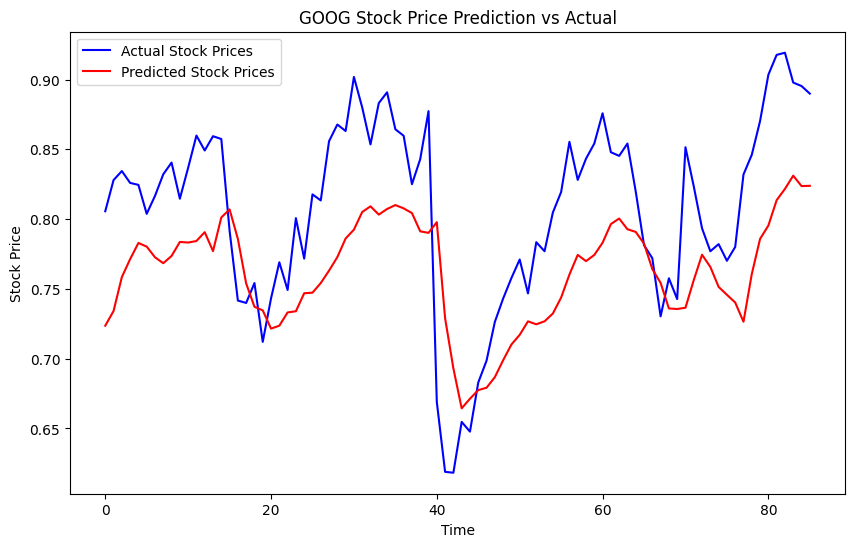

In [ ]:
def train_lstm_model(stock_symbol, num_posts=10, n_splits=5):
    # Prepare the data

    X_train, X_test, y_train, y_test, scaler = prepare_data_for_lstm(stock_symbol, num_posts)

    # Concatenate train and test data for a single X and y
    X = np.concatenate([X_train, X_test])
    y = np.concatenate([y_train, y_test])

    # Split data into training and testing
    X_train, X_test, y_train, y_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

    # Initialize the best model from the previous tuning

    best_model, _ = cross_validate_lstm(stock_symbol, num_posts, n_splits) # Changed to call cross_validate_lstm

    # Train the model with the training data
    history = best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Model evaluation
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Evaluation Metrics for {stock_symbol}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R2 Score: {r2}")

    # Visualizing the prediction vs actual data
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, color='blue', label='Actual Stock Prices')
    plt.plot(y_pred, color='red', label='Predicted Stock Prices')
    plt.title(f"{stock_symbol} Stock Price Prediction vs Actual")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

    return best_model, history

# Example usage for training and evaluating the model for AAPL stock
best_model, history = train_lstm_model('GOOG', num_posts=10, n_splits=5)

Since we use RapidAPI, we cannot use it in mutliple stocks, So lets use reddit API directly and Extract features and Sentiment scores and predict

In [2]:
!pip install praw

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 189.3/189.3 kB 4.9 MB/s eta 0:00:00


**Setting up Reddit API Access**:

This section establishes a connection to the Reddit API using praw. You'll need to replace the placeholders for client_id, client_secret, and user_agent with your actual Reddit API credentials. These credentials identify your application to Reddit.

**Defining Targets for Data Collection**:

subreddits: This list specifies the Reddit communities (subreddits) that the code will collect data from. In this case, it's "stocks" and "investing."
tickers: This list contains the stock symbols (tickers) that the code will search for within the Reddit posts.

**Fetching Reddit Posts**:

This function fetch_reddit_posts does the following:
Takes a ticker (stock symbol) and an optional limit (number of posts to fetch, defaulting to 100).
Iterates through the subreddits specified earlier.
Searches for posts in each subreddit that contain the ticker.
Extracts relevant information from each post (ticker, title, score, comments, creation time, content, upvote ratio) and stores it in a list.
Converts the list of posts into a pandas DataFrame for easier handling.

**Performing Sentiment Analysis**:

This function analyze_sentiment:
Takes a DataFrame of Reddit posts (posts_df).
Uses TextBlob to analyze the sentiment of the post title and content. The get_sentiment function calculates a polarity score (positive, negative, or neutral) for a given text.
Adds new columns to the DataFrame

In [4]:
import praw
import pandas as pd
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reddit API credentials (replace with your own credentials)
reddit = praw.Reddit(
    client_id="EzytCSjaTbNqdvTflEl4iw",
    client_secret="GIshSLj10RYsKTGobqmBzCL8hpc4ug",
    user_agent="Stock_Post"
)

# Subreddits to scrape and stock tickers to monitor
subreddits = ["stocks", "investing"]
tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA"]

def fetch_reddit_posts(ticker, limit=100):
    """
    Fetches posts from the specified subreddits containing the given stock ticker.
    """
    posts = []
    for subreddit_name in subreddits:
        subreddit = reddit.subreddit(subreddit_name)
        for post in subreddit.search(ticker, limit=limit):
            posts.append({
                "ticker": ticker,
                "title": post.title,
                "score": post.score,
                "num_comments": post.num_comments,
                "created_utc": post.created_utc,
                "content": post.selftext,
                "upvote_ratio": post.upvote_ratio
            })
    return pd.DataFrame(posts)

def analyze_sentiment(posts_df):
    """
    Performs sentiment analysis on the titles and content of Reddit posts.
    """
    def get_sentiment(text):
        blob = TextBlob(text)
        return blob.sentiment.polarity

    posts_df["title_sentiment"] = posts_df["title"].apply(get_sentiment)
    posts_df["content_sentiment"] = posts_df["content"].apply(get_sentiment)
    posts_df["average_sentiment"] = posts_df[["title_sentiment", "content_sentiment"]].mean(axis=1)
    return posts_df

# Fetch and process posts for all tickers
all_posts = []
for ticker in tickers:
    posts = fetch_reddit_posts(ticker)
    if not posts.empty:
        posts = analyze_sentiment(posts)
        all_posts.append(posts)

# Combine sentiment data for all tickers
reddit_sentiment_df = pd.concat(all_posts, ignore_index=True)
reddit_sentiment_df.to_csv("reddit_sentiment_data.csv", index=False)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

**Fetching and Preparing Stock Data**

* Import yfinance: import yfinance as yf imports the yfinance library, which is used to download stock market data. It's given the alias yf for easier use in the code.

**Download Stock Data:**

* nasdaq_tickers = tickers assigns the list of stock symbols (tickers) to nasdaq_tickers. This assumes you have a list of stock symbols defined elsewhere in your code (likely the tickers variable).
* stock_data = yf.download(nasdaq_tickers, start="2018-01-01", end="2023-01-01") uses yfinance to download historical stock data for the specified nasdaq_tickers from January 1, 2018, to January 1, 2023.
* stock_prices = stock_data["Adj Close"] extracts the "Adjusted Close" prices from the downloaded stock_data. Adjusted Close prices are often used in financial analysis because they account for stock splits and dividends.

**Normalize Stock Prices:**

* scaler = MinMaxScaler(feature_range=(0, 1)) creates a MinMaxScaler object. This is used to scale the stock prices to a specific range (0 to 1 in this case). Scaling is often done to improve the performance of machine learning models.
* scaled_prices = scaler.fit_transform(stock_prices) applies the scaling to the stock_prices data.

**Merging Sentiment and Stock Data**

**Prepare Sentiment Data:** reddit_sentiment_df["created_date"] = pd.to_datetime(reddit_sentiment_df["created_utc"], unit="s") converts the created_utc column (which likely represents the post creation time in Unix timestamp format) in the reddit_sentiment_df DataFrame to a datetime format using pd.to_datetime.

**Merge DataFrames:**

* merged_data = pd.merge_asof(...) performs an "as-of" merge between the reddit_sentiment_df and the stock_prices DataFrame. This type of merge is commonly used with time series data to align data points based on the closest date.
* It merges based on the created_date column.
The stock_prices DataFrame is first reset its index (using reset_index()) and the "Date" column is renamed to "created_date" to match the column in the reddit_sentiment_df.

**Handle Missing Values:** merged_data.fillna(method="bfill", inplace=True) fills any missing values (NaN) in the merged_data DataFrame using backward fill (bfill). This means that if a stock price is missing for a particular date, it will be filled with the next available stock price.

**Save Merged Data:** merged_data.to_csv("merged_data.csv", index=False) saves the merged DataFrame to a CSV file named "merged_data.csv". The index=False argument prevents the DataFrame index from being saved to the file.

In [5]:
import yfinance as yf

# Fetch NASDAQ stock data
nasdaq_tickers = tickers  # Same tickers monitored on Reddit
stock_data = yf.download(nasdaq_tickers, start="2018-01-01", end="2023-01-01")
stock_prices = stock_data["Adj Close"]

# Normalize stock prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(stock_prices)

# Merge Reddit sentiment data with stock prices
reddit_sentiment_df["created_date"] = pd.to_datetime(reddit_sentiment_df["created_utc"], unit="s")
merged_data = pd.merge_asof(
    reddit_sentiment_df.sort_values("created_date"),
    stock_prices.reset_index().rename(columns={"Date": "created_date"}),
    on="created_date"
)

merged_data.fillna(method="bfill", inplace=True)
merged_data.to_csv("merged_data.csv", index=False)


[*********************100%***********************]  5 of 5 completed
<ipython-input-5-d27ad5c5b1f7>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method="bfill", inplace=True)


**Stock Symbols**

This creates a list called nasdaq_100_symbols containing the stock symbols of the companies to be analyzed.

**Function: fetch_reddit_sentiment**

This function scrapes Reddit posts related to a specific stock_symbol from the "stocks" subreddit.
It uses TextBlob to analyze the sentiment of each post's title and content.
It returns the average sentiment score for the posts.

**Main Workflow:**

**1. Initialization:**

* start_date, end_date: These variables define the period for which stock data will be fetched.
The code iterates through each stock_symbol in the nasdaq_100_symbols list.

**2. Fetching Data:**

* **Reddit Sentiment:**
 * sentiment_score = fetch_reddit_sentiment(stock_symbol): Calls the fetch_reddit_sentiment function to scrape Reddit posts related to the current stock_symbol and calculate the average sentiment score.
* **Historical Stock Data:**
 * stock_data = fetch_stock_data(stock_symbol, start_date, end_date): Calls the fetch_stock_data function to download historical stock data for the current stock_symbol within the specified date range.

**3. Data Preparation:**

* **Sentiment Array:**
 * sentiment_array = np.full(stock_data.shape[0], sentiment_score): Creates an array filled with the calculated sentiment_score, having the same length as the stock data. This ensures that each stock data point is associated with the corresponding sentiment.
* **Preprocessing:**
 * X, y, scaler = preprocess_data(stock_data.values.reshape(-1, 1), sentiment_array): Calls the preprocess_data function to scale the stock data and sentiment scores, and create the input sequences (X) and target values (y) for the LSTM model. The scaler object is also returned for later use.

**4. Model Training and Evaluation:**

* **Data Splitting:**
 * train_size = int(len(X) * 0.8): Calculates the size of the training dataset (80% of the data).
 * X_train, X_test = X[:train_size], X[train_size:]: Splits the input data (X) into training and testing sets.
 * y_train, y_test = y[:train_size], y[train_size:]: Splits the target values (y) into training and testing sets.

* **Model Training:**
 * model = train_lstm_model(X_train, y_train): Calls the train_lstm_model function to build and train the LSTM model using the training data.

* **Model Evaluation:**
 * evaluate_model(model, X_test, y_test, scaler, stock_symbol): Calls the evaluate_model function to make predictions on the test data, reverse the scaling to get actual stock prices, and visualize the results (predicted vs. actual stock prices).



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Processing AAPL...


[*********************100%***********************]  1 of 1 completed

Sentiment score for AAPL: 0.10603052905768133



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 70ms/step - loss: 0.0792
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 94ms/step - loss: 0.0037
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 52ms/step - loss: 0.0024
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 72ms/step - loss: 0.0025
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 87ms/step - loss: 0.0026
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 55ms/step - loss: 0.0023
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 108ms/step - loss: 0.0023
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 77ms/step - loss: 0.0022
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 91ms/step - loss: 0.0022
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

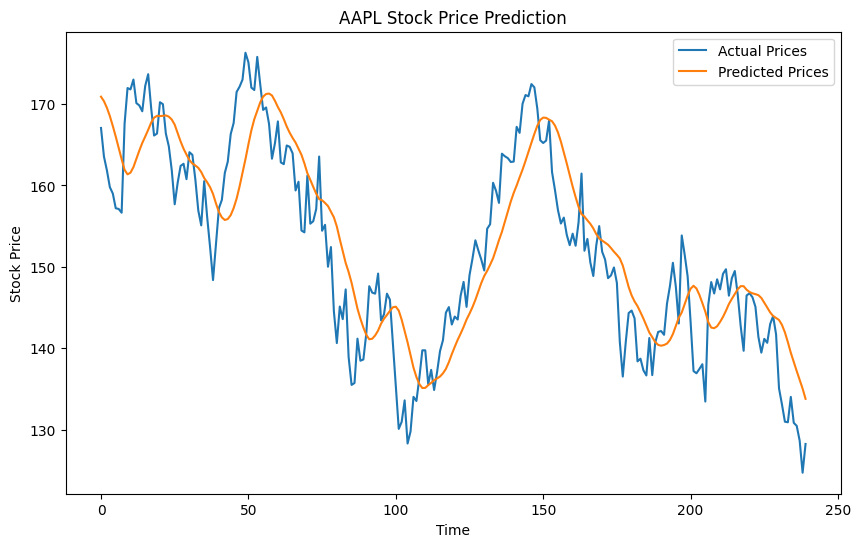

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Processing MSFT...


[*********************100%***********************]  1 of 1 completed

Sentiment score for MSFT: 0.11330247836205627
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 64ms/step - loss: 0.0732
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 54ms/step - loss: 0.0053
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 54ms/step - loss: 0.0031
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 55ms/step - loss: 0.0032
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 58ms/step - loss: 0.0024
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 90ms/step - loss: 0.0026
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 68ms/step - loss: 0.0024
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 54ms/step - loss: 0.0027
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 55ms/step - loss: 0.0027
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

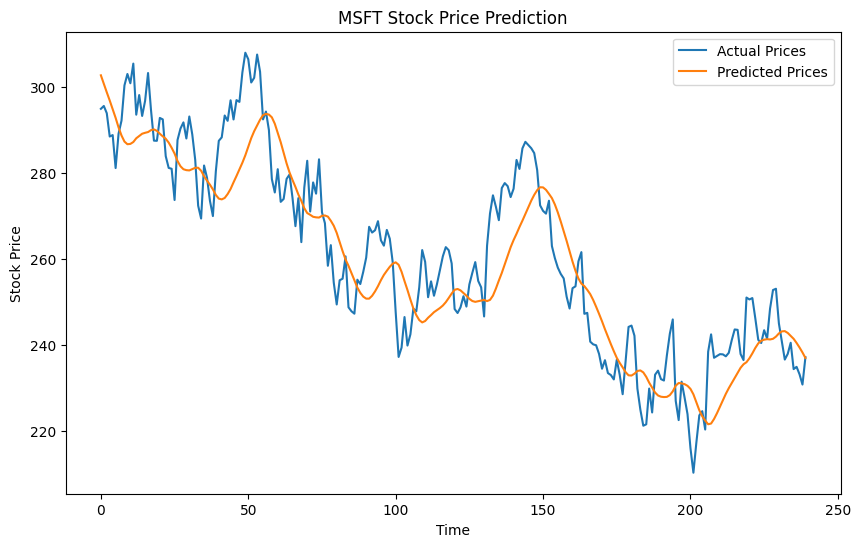

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Processing GOOG...


[*********************100%***********************]  1 of 1 completed

Sentiment score for GOOG: 0.10747908568237012
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 80ms/step - loss: 0.0634
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 58ms/step - loss: 0.0038
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 57ms/step - loss: 0.0024
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0021
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 84ms/step - loss: 0.0027
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 93ms/step - loss: 0.0032
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 57ms/step - loss: 0.0026
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 57ms/step - loss: 0.0024
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 58ms/step - loss: 0.0022
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

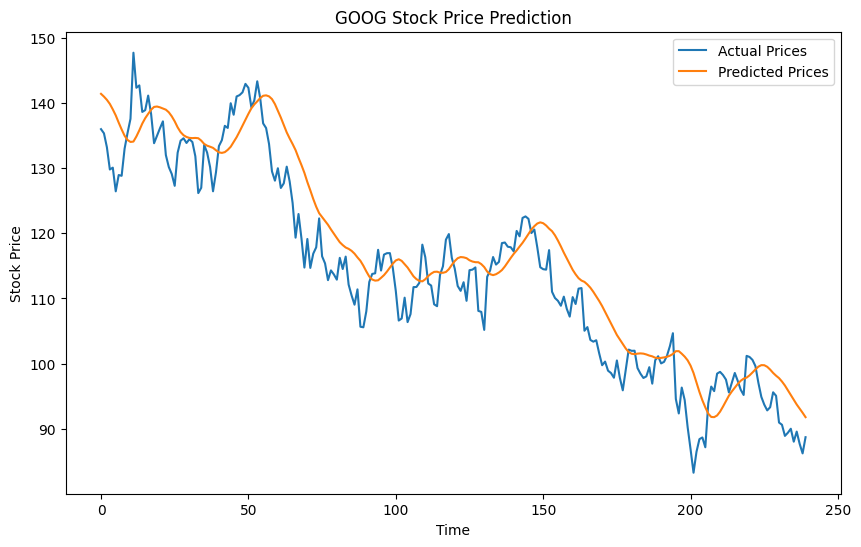

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Processing AMZN...


[*********************100%***********************]  1 of 1 completed

Sentiment score for AMZN: 0.08407853388754997
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 57ms/step - loss: 0.1354
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 59ms/step - loss: 0.0083
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 81ms/step - loss: 0.0048
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 92ms/step - loss: 0.0043
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 56ms/step - loss: 0.0046
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 60ms/step - loss: 0.0050
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 58ms/step - loss: 0.0041
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 71ms/step - loss: 0.0038
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 123ms/step - loss: 0.0039
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

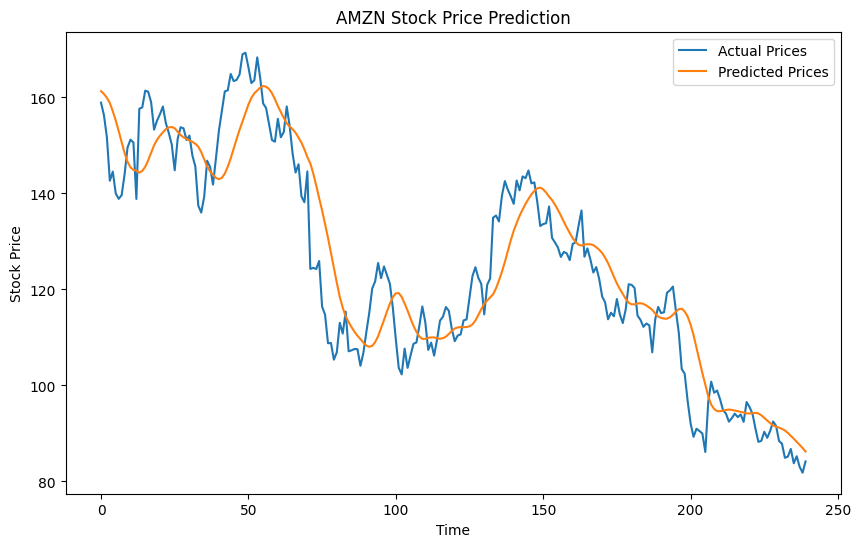

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Processing TSLA...


[*********************100%***********************]  1 of 1 completed

Sentiment score for TSLA: 0.06220362781953071
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35s 77ms/step - loss: 0.0469
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 76ms/step - loss: 0.0029
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 93ms/step - loss: 0.0033
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 89ms/step - loss: 0.0020
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 60ms/step - loss: 0.0028
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 61ms/step - loss: 0.0024
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 60ms/step - loss: 0.0026
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 61ms/step - loss: 0.0028
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 87ms/step - loss: 0.0019
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

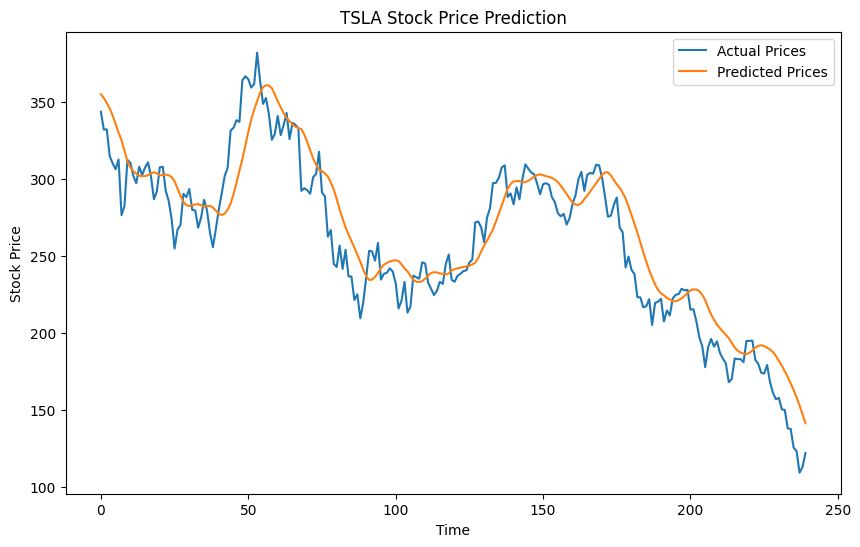

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Processing META...


[*********************100%***********************]  1 of 1 completed

Sentiment score for META: 0.06744659064633611
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 63ms/step - loss: 0.0893
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 62ms/step - loss: 0.0071
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 91ms/step - loss: 0.0040
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 62ms/step - loss: 0.0045
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 59ms/step - loss: 0.0046
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 60ms/step - loss: 0.0039
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 62ms/step - loss: 0.0036
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 94ms/step - loss: 0.0037
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 66ms/step - loss: 0.0035
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

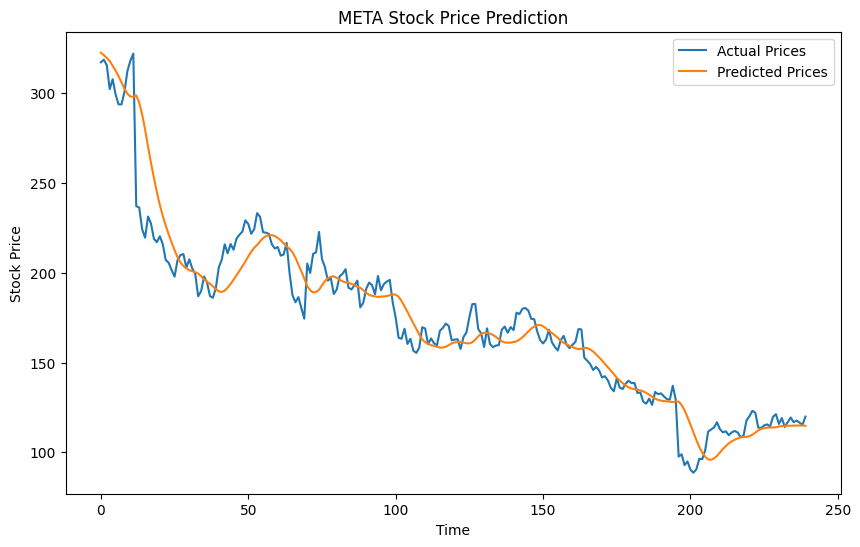

In [82]:
import praw
import yfinance as yf
import pandas as pd
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Reddit API setup (replace with your credentials)
reddit = praw.Reddit(
    client_id="EzytCSjaTbNqdvTflEl4iw",
    client_secret="GIshSLj10RYsKTGobqmBzCL8hpc4ug",
    user_agent="Stock_News"
)

# List of NASDAQ-100 companies
nasdaq_100_symbols = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'META']

# Function to scrape Reddit posts and extract sentiment
def fetch_reddit_sentiment(stock_symbol, limit=100):
    subreddit = reddit.subreddit("stocks")
    posts = subreddit.search(stock_symbol, limit=limit)
    sentiments = []
    for post in posts:
        blob = TextBlob(post.title + " " + post.selftext)
        sentiment = blob.sentiment.polarity
        sentiments.append(sentiment)
    return np.mean(sentiments) if sentiments else 0  # Average sentiment score

# Fetch historical stock data
def fetch_stock_data(symbols, start_date, end_date):
    data = yf.download(symbols, start=start_date, end=end_date)
    return data["Adj Close"]

# Preprocess data for LSTM
def preprocess_data(data, sentiment_scores, time_step=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    sentiment_scores_scaled = MinMaxScaler((0, 1)).fit_transform(sentiment_scores.reshape(-1, 1))
    combined_data = np.hstack([scaled_data, sentiment_scores_scaled])

    X, y = [], []
    for i in range(len(combined_data) - time_step - 1):
        X.append(combined_data[i:(i + time_step)])
        y.append(combined_data[i + time_step, 0])  # Predict stock price
    return np.array(X), np.array(y), scaler

# Build and train LSTM model
def train_lstm_model(X_train, y_train, epochs=20, batch_size=32):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    return model

# Evaluate and plot predictions
def evaluate_model(model, X_test, y_test, scaler, stock_symbol):
    predictions = model.predict(X_test)
    predictions_rescaled = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label='Actual Prices')
    plt.plot(predictions_rescaled, label='Predicted Prices')
    plt.title(f'{stock_symbol} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Main workflow
start_date = '2018-01-01'
end_date = '2023-01-01'

for stock_symbol in nasdaq_100_symbols:
    print(f"Processing {stock_symbol}...")

    # Fetch Reddit sentiment
    sentiment_score = fetch_reddit_sentiment(stock_symbol)
    print(f"Sentiment score for {stock_symbol}: {sentiment_score}")

    # Fetch historical stock data
    stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

    # Create a sentiment array of the same length as the stock data
    sentiment_array = np.full(stock_data.shape[0], sentiment_score)

    # Preprocess data
    X, y, scaler = preprocess_data(stock_data.values.reshape(-1, 1), sentiment_array)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Train LSTM model
    model = train_lstm_model(X_train, y_train)

    # Evaluate the model
    evaluate_model(model, X_test, y_test, scaler, stock_symbol)


**In essence, the main workflow:**

* Fetches Reddit sentiment and historical stock data for each stock symbol.
* Preprocesses the data, creating input sequences and target values for the LSTM model

___________________________________________________

**Main Workflow:**

Initialization:

start_date, end_date: Define the time period for fetching stock data.
The code iterates through each stock_symbol in the nasdaq_100_symbols list (e.g., 'AAPL', 'MSFT', etc.).

Data Collection:

Reddit Sentiment:

sentiment_score = fetch_reddit_sentiment(stock_symbol): Calls the fetch_reddit_sentiment function to get the average sentiment score for the current stock_symbol from Reddit posts.

Historical Stock Data:

stock_data = fetch_stock_data(stock_symbol, start_date, end_date): Calls the fetch_stock_data function to download historical stock prices (Adjusted Close) for the current stock_symbol.

Data Preparation:

Sentiment Array:
sentiment_array = np.full(stock_data.shape[0], sentiment_score): Creates an array with the same length as the stock data, where each element is the calculated sentiment_score. This associates the sentiment with each day's stock data.

Preprocessing:

X, y, scaler = preprocess_data(stock_data.values.reshape(-1, 1), sentiment_array):
Calls the preprocess_data function to:
Scale the stock prices and sentiment scores using MinMaxScaler.
Create input sequences (X) and target values (y) for the LSTM model. X contains historical data (stock prices and sentiment) used to predict y, which is the future stock price.
Returns the scaler object for later use (to reverse the scaling and get actual prices).

Model Training and Evaluation:

Data Splitting:

train_size = int(len(X) * 0.8): Calculates the size of the training dataset (80% of the data).
X_train, X_test = X[:train_size], X[train_size:]: Splits the input data (X) into training and testing sets.
y_train, y_test = y[:train_size], y[train_size:]: Splits the target values (y) into training and testing sets.

Model Training:

model = train_lstm_model(X_train, y_train): Calls the train_lstm_model function to build and train an LSTM neural network using the training data.

Model Evaluation:

evaluate_model_accuracy(model, X_test, y_test, scaler, stock_symbol):
Calls the evaluate_model_accuracy function to:
Make predictions on the test data

In [95]:
import praw
import yfinance as yf
import pandas as pd
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Reddit API setup (replace with your credentials)
reddit = praw.Reddit(
    client_id="EzytCSjaTbNqdvTflEl4iw",
    client_secret="GIshSLj10RYsKTGobqmBzCL8hpc4ug",
    user_agent="Stock_News"
)

# List of NASDAQ-100 companies
nasdaq_100_symbols = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'META']

# Function to scrape Reddit posts and extract sentiment
def fetch_reddit_sentiment(stock_symbol, limit=100):
    subreddit = reddit.subreddit("stocks")
    posts = subreddit.search(stock_symbol, limit=limit)
    sentiments = []
    for post in posts:
        blob = TextBlob(post.title + " " + post.selftext)
        sentiment = blob.sentiment.polarity
        sentiments.append(sentiment)
    return np.mean(sentiments) if sentiments else 0  # Average sentiment score

# Fetch historical stock data
def fetch_stock_data(symbols, start_date, end_date):
    data = yf.download(symbols, start=start_date, end=end_date)
    return data["Adj Close"]

# Preprocess data for LSTM
def preprocess_data(data, sentiment_scores, time_step=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    sentiment_scores_scaled = MinMaxScaler((0, 1)).fit_transform(sentiment_scores.reshape(-1, 1))
    combined_data = np.hstack([scaled_data, sentiment_scores_scaled])

    X, y = [], []
    for i in range(len(combined_data) - time_step - 1):
        X.append(combined_data[i:(i + time_step)])
        y.append(combined_data[i + time_step, 0])  # Predict stock price
    return np.array(X), np.array(y), scaler

# Build and train LSTM model
def train_lstm_model(X_train, y_train, epochs=20, batch_size=32):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    return model

# Evaluate and print accuracy for each stock
def evaluate_model_accuracy(model, X_test, y_test, scaler, stock_symbol):
    # Make predictions
    predictions = model.predict(X_test)
    predictions_rescaled = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate metrics
    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)
    r2 = r2_score(y_test_rescaled, predictions_rescaled)

    print(f"Accuracy for {stock_symbol}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")
    print(f"R¬≤ Score: {r2}")



# Main workflow
start_date = '2018-01-01'
end_date = '2023-01-01'

for stock_symbol in nasdaq_100_symbols:
    print(f"\nProcessing {stock_symbol}...")

    # Fetch Reddit sentiment
    sentiment_score = fetch_reddit_sentiment(stock_symbol)
    print(f"Sentiment score for {stock_symbol}: {sentiment_score}")

    # Fetch historical stock data
    stock_data = fetch_stock_data(stock_symbol, start_date, end_date)

    # Create a sentiment array of the same length as the stock data
    sentiment_array = np.full(stock_data.shape[0], sentiment_score)

    # Preprocess data
    X, y, scaler = preprocess_data(stock_data.values.reshape(-1, 1), sentiment_array)

    # Split data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Train LSTM model
    model = train_lstm_model(X_train, y_train)

    # Evaluate the model
    evaluate_model_accuracy(model, X_test, y_test, scaler, stock_symbol)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




Processing AAPL...


[*********************100%***********************]  1 of 1 completed

Sentiment score for AAPL: 0.10603052905768133
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 92ms/step - loss: 0.0547
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 58ms/step - loss: 0.0039
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0028
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 57ms/step - loss: 0.0033
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 59ms/step - loss: 0.0031
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 92ms/step - loss: 0.0026
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 57ms/step - loss: 0.0023
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 56ms/step - loss: 0.0023
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 55ms/step - loss: 0.0025
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Accuracy for AAPL:
Mean Squared Error (MSE): 159.3886867708956
Mean Absolute Percentage Error (MAPE): 7.142786967414012%
R¬≤ Score: -0.06651503037082951

Processing MSFT...


[*********************100%***********************]  1 of 1 completed

Sentiment score for MSFT: 0.11330247836205627
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 55ms/step - loss: 0.0511
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 54ms/step - loss: 0.0042
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 55ms/step - loss: 0.0032
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 59ms/step - loss: 0.0027
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 74ms/step - loss: 0.0025
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 95ms/step - loss: 0.0025
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0021
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 55ms/step - loss: 0.0020
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0027
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Accuracy for MSFT:
Mean Squared Error (MSE): 118.10603553509961
Mean Absolute Percentage Error (MAPE): 3.559903357708493%
R¬≤ Score: 0.7789651544341629

Processing GOOG...


[*********************100%***********************]  1 of 1 completed

Sentiment score for GOOG: 0.10747908568237012
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 55ms/step - loss: 0.0648
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 54ms/step - loss: 0.0042
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0022
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 90ms/step - loss: 0.0026
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 54ms/step - loss: 0.0021
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 57ms/step - loss: 0.0026
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 55ms/step - loss: 0.0024
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0020
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 78ms/step - loss: 0.0022
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Accuracy for GOOG:
Mean Squared Error (MSE): 31.2437518675751
Mean Absolute Percentage Error (MAPE): 4.181138550037386%
R¬≤ Score: 0.8677151394026339

Processing AMZN...


[*********************100%***********************]  1 of 1 completed

Sentiment score for AMZN: 0.08407853388754997
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 56ms/step - loss: 0.1136
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 55ms/step - loss: 0.0092
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 72ms/step - loss: 0.0053
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 91ms/step - loss: 0.0048
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 55ms/step - loss: 0.0045
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 57ms/step - loss: 0.0043
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 55ms/step - loss: 0.0046
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 58ms/step - loss: 0.0043
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 92ms/step - loss: 0.0045
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Accuracy for AMZN:
Mean Squared Error (MSE): 69.69193488830594
Mean Absolute Percentage Error (MAPE): 5.379790315821951%
R¬≤ Score: 0.867139241587197

Processing TSLA...


[*********************100%***********************]  1 of 1 completed

Sentiment score for TSLA: 0.06220362781953071
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 57ms/step - loss: 0.0539
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 56ms/step - loss: 0.0047
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 93ms/step - loss: 0.0034
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 56ms/step - loss: 0.0025
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 55ms/step - loss: 0.0024
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 55ms/step - loss: 0.0030
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0023
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 89ms/step - loss: 0.0020
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 78ms/step - loss: 0.0019
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Accuracy for TSLA:
Mean Squared Error (MSE): 371.7512783193876
Mean Absolute Percentage Error (MAPE): 6.405224805956118%
R¬≤ Score: 0.8749825765933559

Processing META...


[*********************100%***********************]  1 of 1 completed

Sentiment score for META: 0.06744659064633611
Epoch 1/20



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 70ms/step - loss: 0.0898
Epoch 2/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 94ms/step - loss: 0.0060
Epoch 3/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 55ms/step - loss: 0.0045
Epoch 4/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 56ms/step - loss: 0.0034
Epoch 5/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 55ms/step - loss: 0.0033
Epoch 6/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 65ms/step - loss: 0.0036
Epoch 7/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 89ms/step - loss: 0.0037
Epoch 8/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 56ms/step - loss: 0.0033
Epoch 9/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 55ms/step - loss: 0.0032
Epoch 10/20
30/30 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

**Here's a summary of how it works:**

**Data Gathering:**
* It fetches historical stock data using yfinance and scrapes Reddit posts related to specific stocks using praw.

**Sentiment Analysis:**
* It performs sentiment analysis on the Reddit posts using TextBlob to determine the overall sentiment (positive, negative, or neutral) towards each stock.

**Data Preprocessing:**
* It scales the stock data and sentiment scores using MinMaxScaler and prepares the data into a format suitable for an LSTM neural network.

**LSTM Model:**
* It builds and trains an LSTM model to learn patterns from the historical stock data and sentiment scores.

**Prediction and Evaluation:**
* It uses the trained LSTM model to make predictions on future stock prices and evaluates the model's accuracy using metrics like Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and R-squared (R¬≤).

**In essence, the code tries to leverage the wisdom** **of the crowd (Reddit users' sentiment) combined** **with historical stock trends to forecast future** **stock price movements.**

**Potential Applications:**

**Stock Trading:**
* The predictions could be used to make informed trading decisions.
* Financial Analysis: It could provide insights into the relationship between social media sentiment and stock performance.
* Risk Management: It could help assess potential risks associated with specific stocks based on public sentiment.
* Limitations:

**Reddit Data:**
* The accuracy of the model heavily relies on the quality and relevance of Reddit data. Bias and manipulation on Reddit could affect the sentiment analysis and prediction outcomes.
* Market Volatility: Stock markets are inherently volatile, and external factors not captured in the model (e.g., news events, economic indicators) can significantly influence stock prices.
* Overfitting: The model might overfit to the training data, leading to poor generalization on unseen data. Careful hyperparameter tuning and cross-validation are necessary to mitigate this risk.